

# P4 Group 12 Members





EUNISE TAN SEE KEE, 2303017@sit.singaporetech.edu.sg , Digital Supply Chain (DSC)

WONG J-CHYI , 2303127@sit.singaporetech.edu.sg , Digital Supply Chain (DSC)

LAI JIAWEN , 2302962@sit.singaporetech.edu.sg , Digital Supply Chain (DSC)

LIU JIAXIN , 2302951@sit.singaporetech.edu.sg , Digital Supply Chain (DSC)

ONG ZHEN YANG , 2303279@sit.singaporetech.edu.sg , Digital Supply Chain (DSC)

STEPHANIE LING KHAI-MEI , 2302967@sit.singaporetech.edu.sg , Digital Supply Chain (DSC)


# INF2008 Lab P4 Group 12's Problem Statement Introduction




For this project, we will explain our hands-on experience for our Machine Learning development based on a real-world dataset.

<br>

First and foremost, we would like to introduce some basic context. A Supply Chain is an entire system of producing and delivering a product or service. This means it starts from the very beginning stage of planning to the final delivery of the product or service to end-users.

The following figure illustrates a basic supply chain.







Figure 1:

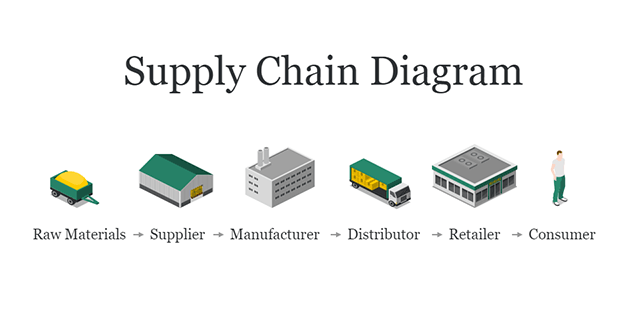

Supply chain planning involves optimizing the manufacturing and delivery of goods. This starts from the raw materials to the finished products, from the suppliers all the way to customers. Essentially, it's a demand-driven management process aimed at balancing the right amount between shortage and surplus. Figure 2 below illustrates this process.

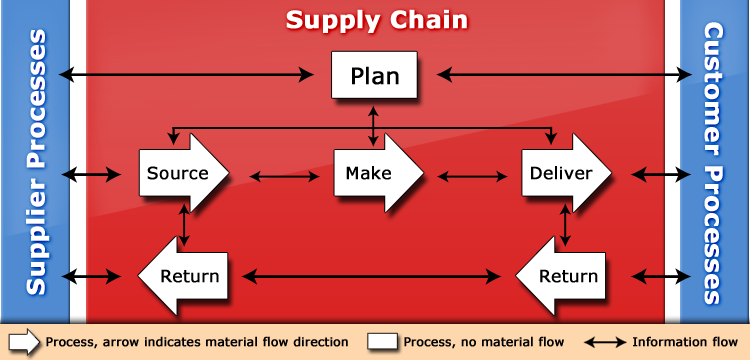

<br>

Planning plays a crucial role in supply chains as it can significantly impact the success of subsequent stages. In a typical Sales & Operations Planning (S&OP) process, one of the key components of the planning process is demand forecasting, which is essential for ensuring that businesses can meet customer needs efficiently.

By accurately forecasting future demand, businesses can optimize their inventory management, reduce excess stock and shortage, reduce loss of sales, and enhance overall supply chain efficiency to improve customer satisfaction.

Figure 3 below illustrates the key processes involved in supply chain planning.

Figure 3:

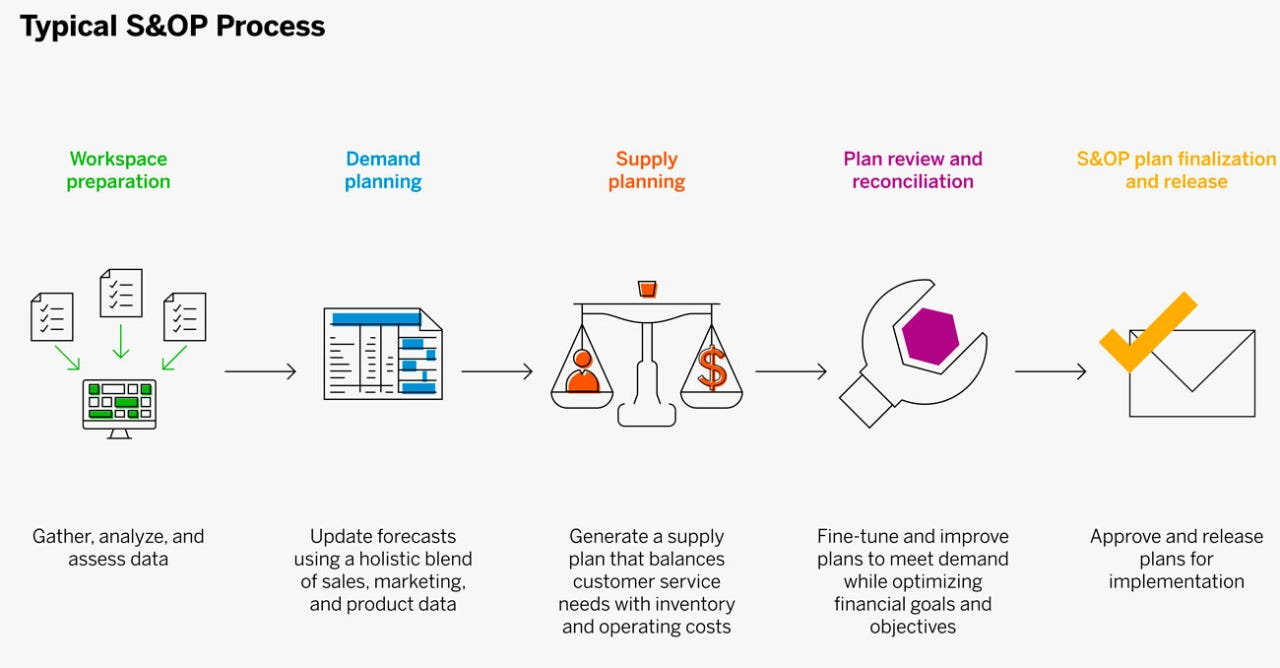

All of us are studying under the Digital Supply Chain degree and we were interested in applying what we learned from Machine Learning to identify trends and patterns in the area of Demand Planning .

<br><br>

## Problem Statement




Supply chain companies are facing challenges with excess inventory due to poor demand planning. Hence there is a need for demand forecasting in order to prevent high cost due to excess inventory.​

For this project, we aim to forecast demand for a dataset to ensure effective inventory management. We want to analyze demand patterns across all SKUs to enhance forecasting accuracy which will reduce the likelihood of stockouts, and optimize inventory levels to meet customer needs effectively.

## Hypothesis


Products with higher sales in the current year will likely continue to have higher demand in the following year, as sales trends are a strong indicator of future purchasing behavior.


## Dataset

The following reference is the actual sales sample dataset which we decided to use for our project. We will be explaining and analyzing it more indepth later in this project.

Segura, G. (2016, November 24). Sample sales data. Kaggle. https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/data

#Machine Learning Pipeline (Workflow)

In Machine Learning, the very first best practice is to establish  the pipeline. This will enable us, as Data Analysts, to efficiently collect, preprocess, analyze, and model data.

As the Machine Learning pipeline is an iterative process, earlier steps may be revisited based on later results.

<br>

## Our Pipeline Structure:

1. Exploratory Data Analysis (EDA)

2. Cleaning and Formatting

3. Data Refinement (Encoding)

4. Perform and Compare Relevant Machine Learning Models With Loss Function Performance Metrics

5. Identify Hyperparameters and Perform Tuning

6. Draw Conclusions on which is the best model

7. Glossary of Terms

8. Appendix

#1. Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is performed as the first step to help us understand the data. The goal is to provide insights into our analysis and key patterns within the dataset.

By performing EDA, we can:

*   Understand the different data statistics
*   Identify missing values and decide the appropriate strategy for handling it later on
*   Analyze if the data is skewed or imbalanced
*   Understand the important features and data types, which will help us identify unhelpful features and decide which features are worth keeping

EDA helps us to explore key questions regarding the dataset by focusing on understanding its features and uncovering patterns. Rather than drawing conclusions early in the project, we aim to look into the data and address both our own and the reader’s initial inquiries.





## 1.1 EDA Consolidated Import Statements

In [ ]:
import pandas as pd
import kagglehub
from IPython.display import Javascript
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Loading and Analyzing using Dataframes

First, let's download the dataset.

Segura, G. (2016, November 24). Sample sales data. Kaggle. https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/data

In [ ]:
# Downloading our dataset from Kaggle
path = kagglehub.dataset_download("kyanyoga/sample-sales-data")

print("Path to dataset files:", path)

100%|██████████| 77.5k/77.5k [00:00<00:00, 36.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1


The selected dataset provides detailed supply chain data related to SKU sales, such as the various product categories, order quantities, customer details and their performance over time, as shown in figure 4.

Figure 4:

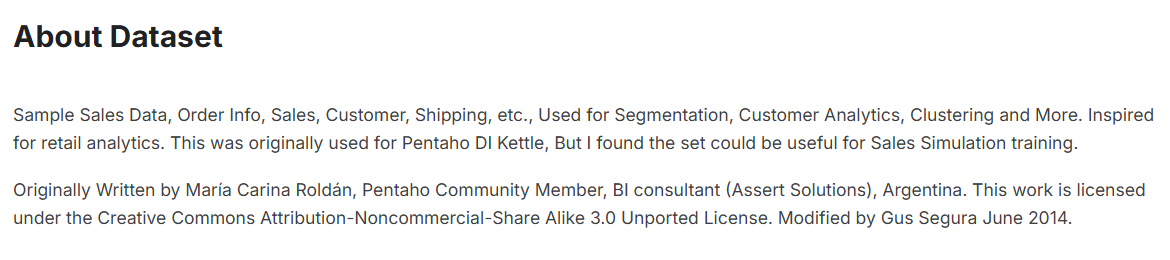

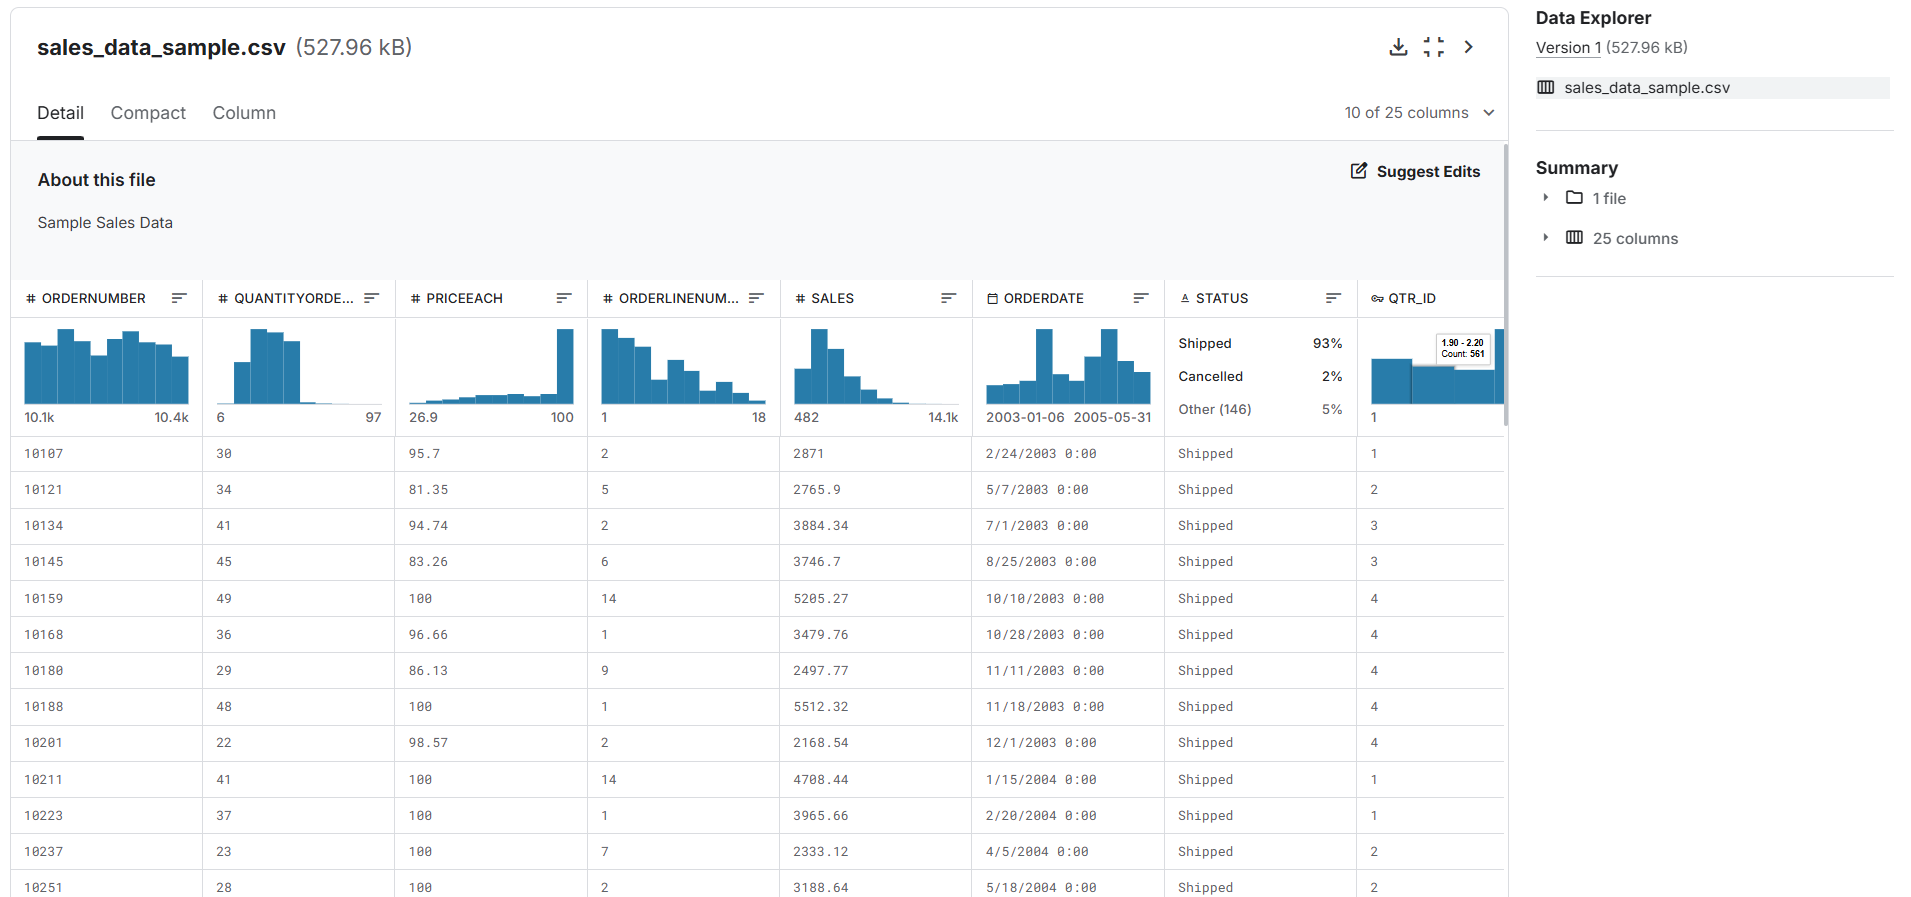

Now, we will look into how the dataset was originally formatted by exploring the list of columns and fields which we might be able to use for our model.

In [ ]:
pd.set_option('display.max_columns', None)

path = "/root/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1"
df = pd.read_csv(f"{path}/sales_data_sample.csv", encoding='latin1')

df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


Each row in the dataset represents a unique sales transaction, including order details, quantity, price, total sales, date, status, product, customer information, and location. Some fields may be excluded later based on their relevance.

<br>

First, we examined the data types and RangeIndex to better understand the formatting and total number of data points.


In [ ]:
print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null

Our dataset consists of 2,823 entries (rows) and 25 columns. The data types include integers (7 columns), floats (2 columns), and objects (16 columns, mainly categorical or textual data). We can conclude that there are sufficient data points. However,  we will need to assess whether each product has sufficient historical data.

Columns such as ADDRESSLINE2, STATE, POSTALCODE, and TERRITORY have missing values, which we will need to identify how to address as they might affect our study.

<br>

Next, we will gather statistics from our data to understand the variability or how statistically close some aspects can be. We will be using the ‘describe’ and Seaborn functions to help us summarize and visualize our dataset.


In [ ]:
df.describe()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


<IPython.core.display.Javascript object>

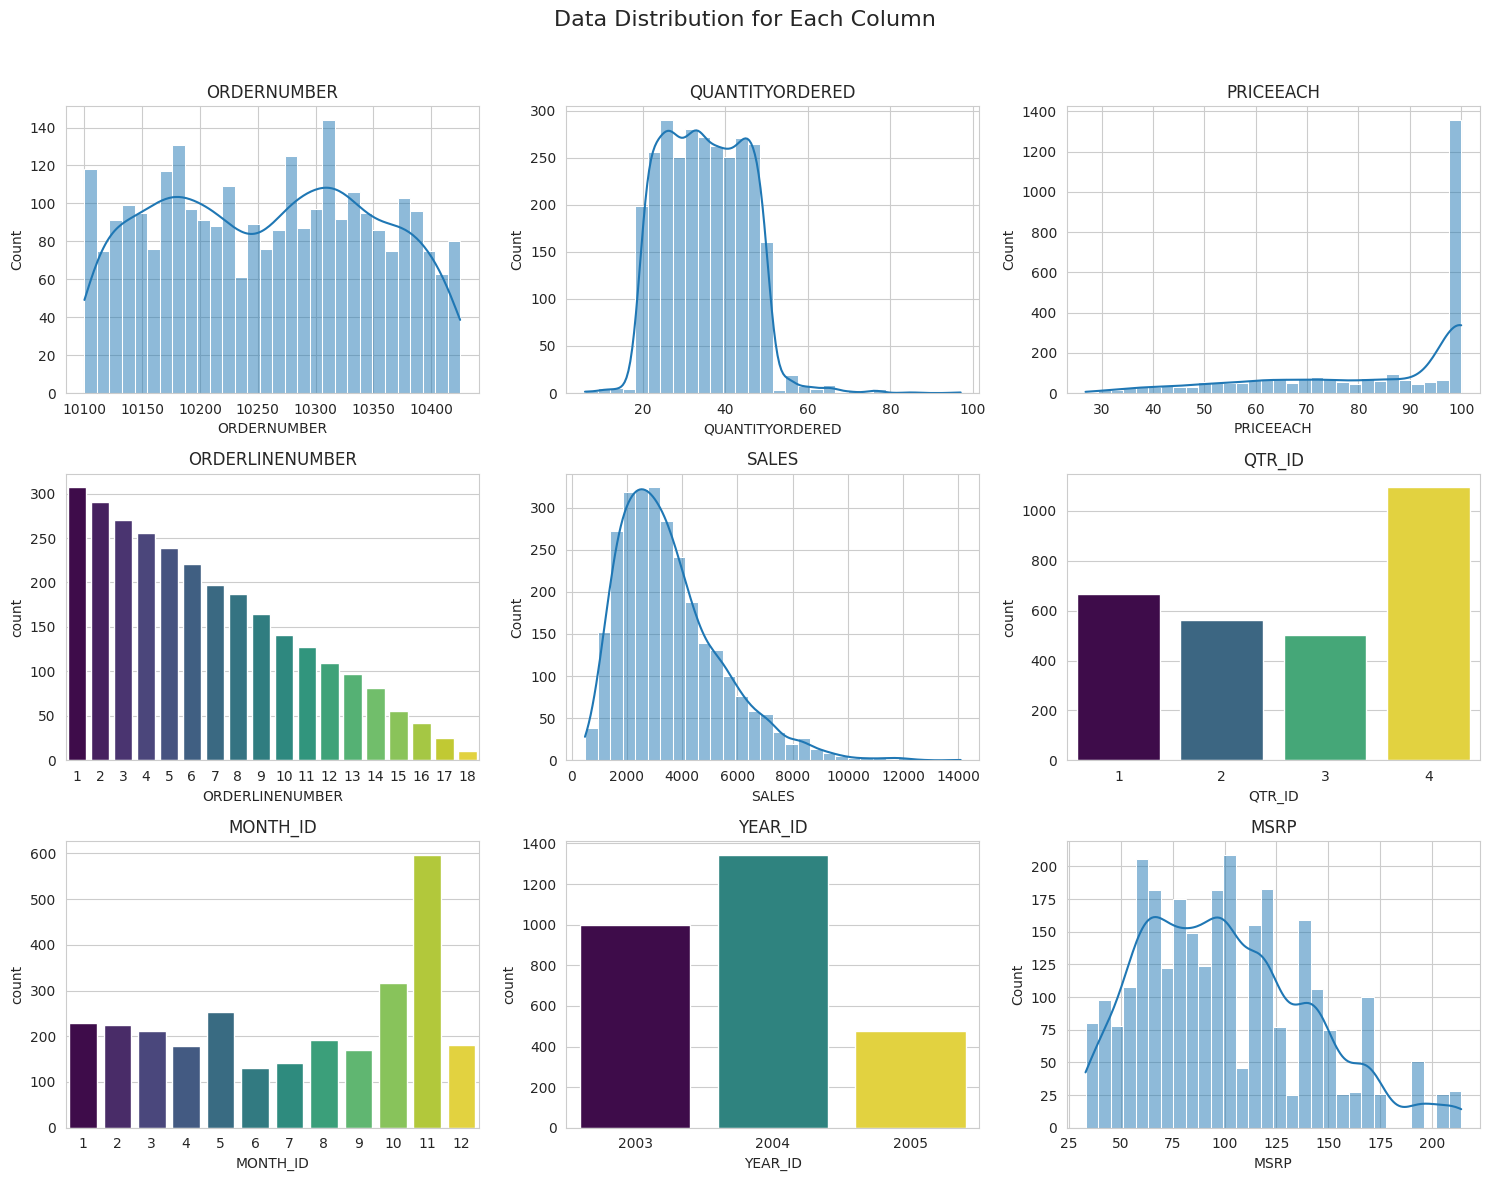

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

fig.suptitle("Data Distribution for Each Column", fontsize=16)

columns = ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']

for ax, col in zip(axes.flat, columns):
    if df[col].nunique() > 20:
        sns.histplot(df[col], kde=True, bins=30, ax=ax)
    else:
        sns.countplot(x=df[col], ax=ax, hue=df[col], legend=False, palette="viridis")
    ax.set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Key Insights:

*   The dataset includes orders spanning from 2003 to 2005, with the majority of sales occurring in 2004.
*   Order sizes vary significantly, ranging from 6 to 97 items per transaction, with an average of 35 units per order.
*   Total sales range from $$482 to $14,082, with an average of $3,553 per order. This variation can be arttributed to diverse pricing, as the average unit price(PRICEEACH) is $83.66, while the MSRP ranges from $33 to $214.
*   The data covers all quarters and months, indicating that at least one order was placed in every month. Additionally, there was a noticeable spike in orders during November, contributing to higher sales in the fourth quarter.



Further analysis is required to ensure a thorough understanding of all input values and to identify any potential anomaly entries in the dataset.

In [ ]:
pd.set_option('display.width', 10000)
def summarize_dataframe(df):
    summary = []
    for col in df.columns:
        summary.append({
            'Column Name': col,
            'Data Type': df[col].dtype,
            'Unique Values': df[col].nunique(),
            'Missing Values': df[col].isna().sum(),
            'Example Values': df[col].dropna().unique()[:5]
        })

    return pd.DataFrame(summary)

summary_df = summarize_dataframe(df)

print(summary_df)


         Column Name Data Type  Unique Values  Missing Values                                     Example Values
0        ORDERNUMBER     int64            307               0                [10107, 10121, 10134, 10145, 10159]
1    QUANTITYORDERED     int64             58               0                               [30, 34, 41, 45, 49]
2          PRICEEACH   float64           1016               0                 [95.7, 81.35, 94.74, 83.26, 100.0]
3    ORDERLINENUMBER     int64             18               0                                   [2, 5, 6, 14, 1]
4              SALES   float64           2763               0         [2871.0, 2765.9, 3884.34, 3746.7, 5205.27]
5          ORDERDATE    object            252               0  [2/24/2003 0:00, 5/7/2003 0:00, 7/1/2003 0:00,...
6             STATUS    object              6               0  [Shipped, Disputed, In Process, Cancelled, On ...
7             QTR_ID     int64              4               0                                   

Columns with missing values are ADDRESSLINE2, STATE, POSTALCODE and TERRITORY. These columns have no relation to demand planning and are not important to our study. We will also be dropping these columns in a later part.

<br>

Next, we will confirm if all products have enough data points for our study as we want to observe and identify if there are any products which could possibly be on a Build-to-Order (BTO) basis. For products with demand as low as only a few units would mean that there could be insufficient datapoints for our models to use.

Furthermore, we will analyze the distribution of order dates across all products by examining the variance in order frequency.


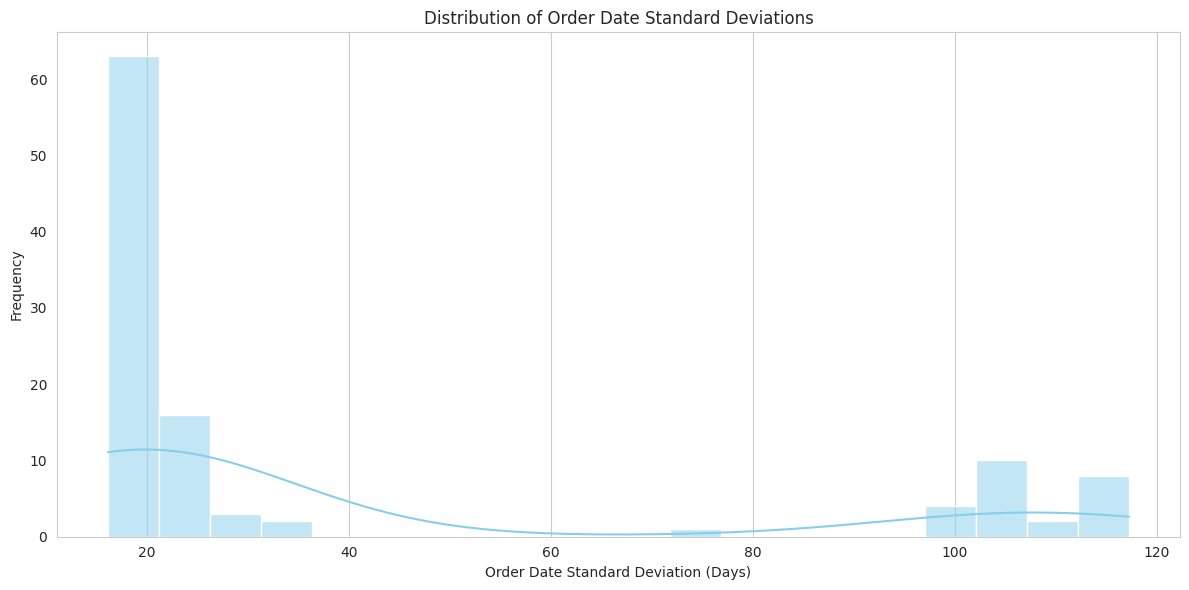

In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

product_order_count = df.groupby('PRODUCTCODE').agg(
    Number_of_Orders=('ORDERDATE', 'nunique'),
    Order_Date_Std=('ORDERDATE', lambda x: x.diff().dt.days.std())
).reset_index()

product_order_count.columns = ['Product Code', 'Number of Orders', 'Order Date Std Dev']

plt.figure(figsize=(12, 6))
sns.histplot(product_order_count['Order Date Std Dev'], bins=20, kde=True, color='skyblue')
plt.xlabel('Order Date Standard Deviation (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Date Standard Deviations')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

This is how we can interpret the standard deviation:

* Low Standard Deviation (~16-25 days): Orders are placed regularly, indicating steady demand (e.g., S10_4698, S50_1341).

* Medium Standard Deviation (~26-40 days): Orders show some regularity but have occasional gaps between orders, indicating fluctuating demand (e.g., S18_2248, S24_3969).


* High Standard Deviation (100+ days): Orders are irregular, with long gaps between purchases,  indicating low demand (e.g., S12_1099, S18_1589).


<br>

The graph shows that the majority of products have a low standard deviation, indicating stable demand. However, some products exhibit a higher standard deviation, suggesting unpredictable demand and the need for improved inventory planning.

<br>

There are no products with extremely high standard deviation, such as above 200 or 300. This means that all products are ordered fairly consistently, however the duration of orders differs between each product.



Based on our Exploratory Data Analysis, Supervised machine learning is the most suitable approach for predicting future demand using historical data because our dataset consists of labeled data. Since the model learns from labeled historical examples, our models can generalize patterns and predict future demand when given input data.

Since sufficient historical data is available for all products, we will first focus on Product Code, Quantity, and Order Dates to model demand patterns. Our goal is to develop a model that learns the relationship between input features and labeled outputs, allowing it to predict future demand.

# 2. Cleaning and Formatting

Data cleaning and formatting is the next essential step in the data analysis process. Performing proper data cleaning will help improve the quality and results of the model. This step is crucial for preparing the data by removing or correcting any inaccuracies, duplicates, or improper formatting.

## 2.1 Cleaning and Formatting Consolidated Import Statements

In [ ]:
import pandas as pd

## 2.2 Data Cleaning

Firstly, we will check and remove any duplicates. This will help to avoid biased models and improve the model's accuracy results in our later phases.

In [ ]:
# Check is there any duplicates
rows_before = df.shape[0]

# Drop duplicate
df = df.drop_duplicates()

rows_after = df.shape[0]

# Check is there still duplicate rows left
rows_deleted = rows_before - rows_after
print(f"Number of rows deleted: {rows_deleted}")

Number of rows deleted: 0


## 2.3 Data Formatting

We extracted the day of the month from the ORDERDATE column and stored it in a new column, DATE_ID. This helps in identifying patterns that vary by the day of the month, such as monthly sales trends or promotional events. Additionally, we extracted a WEEKDAY column, where Monday is represented by 0 and Sunday as 6, to capture variations in demand based on the day of the week, such as an increase in sales on weekends or lower sales on weekdays. These date-related features allow the model to recognize temporal patterns in demand, which can improve forecasting accuracy by identifying recurring trends over time.

In [ ]:
# 'order_id'
df['DATE_ID'] = df['ORDERDATE'].dt.day
# 'Weekday'
df['WEEKDAY'] = df['ORDERDATE'].dt.weekday

# Check
print(df[['DATE_ID', 'WEEKDAY']])

      DATE_ID  WEEKDAY
0          24        0
1           7        2
2           1        1
3          25        0
4          10        4
...       ...      ...
2818        2        3
2819       31        0
2820        1        1
2821       28        0
2822        6        4

[2823 rows x 2 columns]


To analyze possible product trends, we calculated the average quantity ordered per product. This feature allows the model to identify the best-selling products according to the highest average quantity ordered. This would help identify demand trends and can also account for fluctuations in demand for the products, allowing the model to make more accurate and reliable predictions.

In [ ]:
# Calculate the average quantity ordered per product
df["AVG_QUANTITY_PER_PRODUCT"] = df.groupby("PRODUCTCODE")["QUANTITYORDERED"].transform("mean")

In [ ]:
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP PRODUCTCODE              CUSTOMERNAME             PHONE                   ADDRESSLINE1 ADDRESSLINE2           CITY STATE POSTALCODE  COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  DATE_ID  WEEKDAY  AVG_QUANTITY_PER_PRODUCT
0           10107               30      95.70                2  2871.00 2003-02-24   Shipped       1         2     2003  Motorcycles    95    S10_1678         Land of Toys Inc.        2125557818        897 Long Airport Avenue          NaN            NYC    NY      10022      USA       NaN              Yu             Kwai    Small       24        0                 36.307692
1           10121               34      81.35                5  2765.90 2003-05-07   Shipped       2         5     2003  Motorcycles    95    S10_1678        Reims Collectables        26.47.1555             59 rue de l'Abbaye          NaN          

We have decided to drop irrelevant columns such as 'PHONE', 'ADDRESSLINE1’ and 'CITY' as they do not influence demand prediction. Furthermore, the column with missing values that was identified earlier will be dropped as well as it has no relation to demand planning.

In [ ]:
drop_cols = ['PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY','CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'ORDERDATE', 'PRODUCTLINE', 'DEALSIZE']
df = df.drop(columns=drop_cols)

<br><br>

Next, we will confirm which columns remain in the dataset. This will also help us determine the next steps in the process.

In [ ]:
print(df.columns.tolist())

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'COUNTRY', 'DATE_ID', 'WEEKDAY', 'AVG_QUANTITY_PER_PRODUCT']


As you can see above, there are a few particular columns such as ‘QUANTITYORDERED’ and ‘ORDERDATES’ which are relevant to our study. However, we have yet to format them. Converting the cleaned data we have now into a format suitable for machine learning algorithms will directly affect how effectively our model can learn from the data.

Now, let's take a look at the dataset with the remaining columns.

In [ ]:
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES    STATUS  QTR_ID  MONTH_ID  YEAR_ID  MSRP PRODUCTCODE              CUSTOMERNAME  COUNTRY  DATE_ID  WEEKDAY  AVG_QUANTITY_PER_PRODUCT
0           10107               30      95.70                2  2871.00   Shipped       1         2     2003    95    S10_1678         Land of Toys Inc.      USA       24        0                 36.307692
1           10121               34      81.35                5  2765.90   Shipped       2         5     2003    95    S10_1678        Reims Collectables   France        7        2                 36.307692
2           10134               41      94.74                2  3884.34   Shipped       3         7     2003    95    S10_1678           Lyon Souveniers   France        1        1                 36.307692
3           10145               45      83.26                6  3746.70   Shipped       3         8     2003    95    S10_1678         Toys4GrownUps.com      USA       25      

We need to ensure that the specified numerical columns are properly formatted as numeric data types and that any non-numeric values were converted to NaN. This step is essential for maintaining data integrity, ensuring accurate analysis and modeling.

In [ ]:
numeric_cols = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MONTH_ID', 'YEAR_ID', 'DATE_ID']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

print(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MONTH_ID', 'YEAR_ID', 'DATE_ID']].head())

   QUANTITYORDERED  PRICEEACH    SALES  MONTH_ID  YEAR_ID  DATE_ID
0               30      95.70  2871.00         2     2003       24
1               34      81.35  2765.90         5     2003        7
2               41      94.74  3884.34         7     2003        1
3               45      83.26  3746.70         8     2003       25
4               49     100.00  5205.27        10     2003       10


Here is the list of all the columns present in the dataset.

In [ ]:
print(df.columns)

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'COUNTRY', 'DATE_ID', 'WEEKDAY', 'AVG_QUANTITY_PER_PRODUCT'], dtype='object')


At this stage, the data has been cleaned and formatted for analysis.


We have grouped the dataset by "QTR_ID", "MONTH_ID", "DATE_ID", "PRODUCTCODE" and "COUNTRY" to aggregate the data at a monthly level. It will then calculate the total demand (QUANTITYORDERED) and total sales (SALES) for each group. It will compute the mean of “PRICEEACH” and “MSRP”. It will then use the first value of the average quantity per product, weekday and MSRP. By doing so, it will summarise the key metrics at a monthly level for further analysis.

This aggregated data offers a comprehensive overview of sales and demand trends by consolidating key metrics across various time periods and product categories. Grouping the data at the monthly level helps identify demand patterns and fluctuations, which is essential for developing a model that can accurately predict future sales demand based on historical trends.


In [ ]:
pd.set_option('display.width', 10000)

monthly_demand = df.groupby(
    [ "QTR_ID", "MONTH_ID", "DATE_ID", "PRODUCTCODE", "COUNTRY"], as_index=False
).agg({
    "QUANTITYORDERED": "sum",
    "SALES": "sum",
    "PRICEEACH": "mean",
    "AVG_QUANTITY_PER_PRODUCT":"first",
    "WEEKDAY":"first",
    "MSRP": "first"
})

print(monthly_demand.head())

   QTR_ID  MONTH_ID  DATE_ID PRODUCTCODE COUNTRY  QUANTITYORDERED    SALES  PRICEEACH  AVG_QUANTITY_PER_PRODUCT  WEEKDAY  MSRP
0       1         1        2    S12_1108  France               46  8602.92      100.0                 37.423077        4   207
1       1         1        2    S12_3148  France               26  3142.36      100.0                 35.920000        4   151
2       1         1        2    S12_3891  France               20  3114.40      100.0                 35.423077        4   173
3       1         1        2    S18_3140  France               24  2622.48      100.0                 32.880000        4   136
4       1         1        2    S18_3259  France               48  5614.56      100.0                 34.400000        4   100


After reviewing our formatted data, we concluded that the YEAR_ID column is not highly significant, as annual demand tends to remain relatively stable. However, specific dates within certain months, days and weekdays are more likely to have a greater impact on demand. This insight will be important as we move forward to the next phase of our analysis.

At this stage, we have addressed the inconsistencies in the dataset to improve its quality. Therefore,  we will conduct encoding and other techniques to make our data more easily retrievable for model training.

#3. Data Refinement (Encoding)

---



In this section, we will focus on refining our data specifically exploring encoding. Data cleaning and formatting and data refinement have significant differences as outlined shows.

**Data Cleaning and Formatting:** This process involves identifying and rectifying errors to reduce inconsistency in data which improves its quality. It deals with the accuracy and consistency of data.

**Data Refinement & Encoding:** This process involves organising and transforming data within our dataset to reduce redundancy, ensure consistency, and improve data quality. Techniques such as encoding categorical variables are included in this process. The aim is to prepare the data for easy retrieval and use in model training


## 3.1 Data Refinement Consolidated Import Statements

In [ ]:
import numpy as np

##3.2 One Hot Encoding

Since many machine learning algorithms require numerical inputs, categorical variables such as PRODUCTCODE and COUNTRY, need to be transformed into numeric formats that algorithms can interpret.

One-hot encoding is our selected method for transforming categorical data. This involves converting each categorical value into a new binary column, where a value of 1 indicates the presence of the category and 0 indicates its absence.

The one-hot encoding approach was selected because it prevents the introduction of any ordinal relationships between categories, which could occur with label encoding. This method preserves the integrity of the information, allowing the model to process the data accurately and make reliable predictions.


In [ ]:
monthly_demand = pd.get_dummies(monthly_demand, columns=['PRODUCTCODE', 'COUNTRY'])

pd.set_option('display.width', 10000)
print("\n=== Dataframe after One Hot Encoding === \n")
print(monthly_demand.head(10))
num_columns = monthly_demand.shape[1]
print(f"The DataFrame has {num_columns} columns.")


=== Dataframe after One Hot Encoding === 

   QTR_ID  MONTH_ID  DATE_ID  QUANTITYORDERED    SALES  PRICEEACH  AVG_QUANTITY_PER_PRODUCT  WEEKDAY  MSRP  PRODUCTCODE_S10_1678  PRODUCTCODE_S10_1949  PRODUCTCODE_S10_2016  PRODUCTCODE_S10_4698  PRODUCTCODE_S10_4757  PRODUCTCODE_S10_4962  PRODUCTCODE_S12_1099  PRODUCTCODE_S12_1108  PRODUCTCODE_S12_1666  PRODUCTCODE_S12_2823  PRODUCTCODE_S12_3148  PRODUCTCODE_S12_3380  PRODUCTCODE_S12_3891  PRODUCTCODE_S12_3990  PRODUCTCODE_S12_4473  PRODUCTCODE_S12_4675  PRODUCTCODE_S18_1097  PRODUCTCODE_S18_1129  PRODUCTCODE_S18_1342  PRODUCTCODE_S18_1367  PRODUCTCODE_S18_1589  PRODUCTCODE_S18_1662  PRODUCTCODE_S18_1749  PRODUCTCODE_S18_1889  PRODUCTCODE_S18_1984  PRODUCTCODE_S18_2238  PRODUCTCODE_S18_2248  PRODUCTCODE_S18_2319  PRODUCTCODE_S18_2325  PRODUCTCODE_S18_2432  PRODUCTCODE_S18_2581  PRODUCTCODE_S18_2625  PRODUCTCODE_S18_2795  PRODUCTCODE_S18_2870  PRODUCTCODE_S18_2949  PRODUCTCODE_S18_2957  PRODUCTCODE_S18_3029  PRODUCTCODE_S18_3136  PRODUCTCODE_

In the next step, we separate the features (X) and the target variable (y). This step is crucial as the algorithm needs the features (X) to learn patterns and make predictions while the target variable (y) predicts the outcome. Without this separation, the model cannot distinguish between input data and the desired prediction.

For our model, we separated QUANTITYORDERED from the features as it is our selected target variable due to its high relevance in forecasting demand.


In [ ]:
X = monthly_demand.drop(columns=['QUANTITYORDERED'])
y = monthly_demand['QUANTITYORDERED']

print("=== Original DataFrame ===")
display(monthly_demand.head())
print("\n=== Modified DataFrame (Without Target Column) ===")
display(X.head())


=== Original DataFrame ===


,QTR_ID,MONTH_ID,DATE_ID,QUANTITYORDERED,SALES,PRICEEACH,AVG_QUANTITY_PER_PRODUCT,WEEKDAY,MSRP,PRODUCTCODE_S10_1678,PRODUCTCODE_S10_1949,PRODUCTCODE_S10_2016,PRODUCTCODE_S10_4698,PRODUCTCODE_S10_4757,PRODUCTCODE_S10_4962,PRODUCTCODE_S12_1099,PRODUCTCODE_S12_1108,PRODUCTCODE_S12_1666,PRODUCTCODE_S12_2823,PRODUCTCODE_S12_3148,PRODUCTCODE_S12_3380,PRODUCTCODE_S12_3891,PRODUCTCODE_S12_3990,PRODUCTCODE_S12_4473,PRODUCTCODE_S12_4675,PRODUCTCODE_S18_1097,PRODUCTCODE_S18_1129,PRODUCTCODE_S18_1342,PRODUCTCODE_S18_1367,PRODUCTCODE_S18_1589,PRODUCTCODE_S18_1662,PRODUCTCODE_S18_1749,PRODUCTCODE_S18_1889,PRODUCTCODE_S18_1984,PRODUCTCODE_S18_2238,PRODUCTCODE_S18_2248,PRODUCTCODE_S18_2319,PRODUCTCODE_S18_2325,PRODUCTCODE_S18_2432,PRODUCTCODE_S18_2581,PRODUCTCODE_S18_2625,PRODUCTCODE_S18_2795,PRODUCTCODE_S18_2870,PRODUCTCODE_S18_2949,PRODUCTCODE_S18_2957,PRODUCTCODE_S18_3029,PRODUCTCODE_S18_3136,PRODUCTCODE_S18_3140,PRODUCTCODE_S18_3232,PRODUCTCODE_S18_3259,PRODUCTCODE_S18_3278,PRODUCTCODE_S18_3320,PRODUCTCODE_S18_3482,PRODUCTCODE_S18_3685,PRODUCTCODE_S18_3782,PRODUCTCODE_S18_3856,PRODUCTCODE_S18_4027,PRODUCTCODE_S18_4409,PRODUCTCODE_S18_4522,PRODUCTCODE_S18_4600,PRODUCTCODE_S18_4668,PRODUCTCODE_S18_4721,PRODUCTCODE_S18_4933,PRODUCTCODE_S24_1046,PRODUCTCODE_S24_1444,PRODUCTCODE_S24_1578,PRODUCTCODE_S24_1628,PRODUCTCODE_S24_1785,PRODUCTCODE_S24_1937,PRODUCTCODE_S24_2000,PRODUCTCODE_S24_2011,PRODUCTCODE_S24_2022,PRODUCTCODE_S24_2300,PRODUCTCODE_S24_2360,PRODUCTCODE_S24_2766,PRODUCTCODE_S24_2840,PRODUCTCODE_S24_2841,PRODUCTCODE_S24_2887,PRODUCTCODE_S24_2972,PRODUCTCODE_S24_3151,PRODUCTCODE_S24_3191,PRODUCTCODE_S24_3371,PRODUCTCODE_S24_3420,PRODUCTCODE_S24_3432,PRODUCTCODE_S24_3816,PRODUCTCODE_S24_3856,PRODUCTCODE_S24_3949,PRODUCTCODE_S24_3969,PRODUCTCODE_S24_4048,PRODUCTCODE_S24_4258,PRODUCTCODE_S24_4278,PRODUCTCODE_S24_4620,PRODUCTCODE_S32_1268,PRODUCTCODE_S32_1374,PRODUCTCODE_S32_2206,PRODUCTCODE_S32_2509,PRODUCTCODE_S32_3207,PRODUCTCODE_S32_3522,PRODUCTCODE_S32_4289,PRODUCTCODE_S32_4485,PRODUCTCODE_S50_1341,PRODUCTCODE_S50_1392,PRODUCTCODE_S50_1514,PRODUCTCODE_S50_4713,PRODUCTCODE_S700_1138,PRODUCTCODE_S700_1691,PRODUCTCODE_S700_1938,PRODUCTCODE_S700_2047,PRODUCTCODE_S700_2466,PRODUCTCODE_S700_2610,PRODUCTCODE_S700_2824,PRODUCTCODE_S700_2834,PRODUCTCODE_S700_3167,PRODUCTCODE_S700_3505,PRODUCTCODE_S700_3962,PRODUCTCODE_S700_4002,PRODUCTCODE_S72_1253,PRODUCTCODE_S72_3212,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,1,1,2,46,8602.92,100.0,37.423077,4,207,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1,2,26,3142.36,100.0,35.920000,4,151,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals


=== Modified DataFrame (Without Target Column) ===


,QTR_ID,MONTH_ID,DATE_ID,SALES,PRICEEACH,AVG_QUANTITY_PER_PRODUCT,WEEKDAY,MSRP,PRODUCTCODE_S10_1678,PRODUCTCODE_S10_1949,PRODUCTCODE_S10_2016,PRODUCTCODE_S10_4698,PRODUCTCODE_S10_4757,PRODUCTCODE_S10_4962,PRODUCTCODE_S12_1099,PRODUCTCODE_S12_1108,PRODUCTCODE_S12_1666,PRODUCTCODE_S12_2823,PRODUCTCODE_S12_3148,PRODUCTCODE_S12_3380,PRODUCTCODE_S12_3891,PRODUCTCODE_S12_3990,PRODUCTCODE_S12_4473,PRODUCTCODE_S12_4675,PRODUCTCODE_S18_1097,PRODUCTCODE_S18_1129,PRODUCTCODE_S18_1342,PRODUCTCODE_S18_1367,PRODUCTCODE_S18_1589,PRODUCTCODE_S18_1662,PRODUCTCODE_S18_1749,PRODUCTCODE_S18_1889,PRODUCTCODE_S18_1984,PRODUCTCODE_S18_2238,PRODUCTCODE_S18_2248,PRODUCTCODE_S18_2319,PRODUCTCODE_S18_2325,PRODUCTCODE_S18_2432,PRODUCTCODE_S18_2581,PRODUCTCODE_S18_2625,PRODUCTCODE_S18_2795,PRODUCTCODE_S18_2870,PRODUCTCODE_S18_2949,PRODUCTCODE_S18_2957,PRODUCTCODE_S18_3029,PRODUCTCODE_S18_3136,PRODUCTCODE_S18_3140,PRODUCTCODE_S18_3232,PRODUCTCODE_S18_3259,PRODUCTCODE_S18_3278,PRODUCTCODE_S18_3320,PRODUCTCODE_S18_3482,PRODUCTCODE_S18_3685,PRODUCTCODE_S18_3782,PRODUCTCODE_S18_3856,PRODUCTCODE_S18_4027,PRODUCTCODE_S18_4409,PRODUCTCODE_S18_4522,PRODUCTCODE_S18_4600,PRODUCTCODE_S18_4668,PRODUCTCODE_S18_4721,PRODUCTCODE_S18_4933,PRODUCTCODE_S24_1046,PRODUCTCODE_S24_1444,PRODUCTCODE_S24_1578,PRODUCTCODE_S24_1628,PRODUCTCODE_S24_1785,PRODUCTCODE_S24_1937,PRODUCTCODE_S24_2000,PRODUCTCODE_S24_2011,PRODUCTCODE_S24_2022,PRODUCTCODE_S24_2300,PRODUCTCODE_S24_2360,PRODUCTCODE_S24_2766,PRODUCTCODE_S24_2840,PRODUCTCODE_S24_2841,PRODUCTCODE_S24_2887,PRODUCTCODE_S24_2972,PRODUCTCODE_S24_3151,PRODUCTCODE_S24_3191,PRODUCTCODE_S24_3371,PRODUCTCODE_S24_3420,PRODUCTCODE_S24_3432,PRODUCTCODE_S24_3816,PRODUCTCODE_S24_3856,PRODUCTCODE_S24_3949,PRODUCTCODE_S24_3969,PRODUCTCODE_S24_4048,PRODUCTCODE_S24_4258,PRODUCTCODE_S24_4278,PRODUCTCODE_S24_4620,PRODUCTCODE_S32_1268,PRODUCTCODE_S32_1374,PRODUCTCODE_S32_2206,PRODUCTCODE_S32_2509,PRODUCTCODE_S32_3207,PRODUCTCODE_S32_3522,PRODUCTCODE_S32_4289,PRODUCTCODE_S32_4485,PRODUCTCODE_S50_1341,PRODUCTCODE_S50_1392,PRODUCTCODE_S50_1514,PRODUCTCODE_S50_4713,PRODUCTCODE_S700_1138,PRODUCTCODE_S700_1691,PRODUCTCODE_S700_1938,PRODUCTCODE_S700_2047,PRODUCTCODE_S700_2466,PRODUCTCODE_S700_2610,PRODUCTCODE_S700_2824,PRODUCTCODE_S700_2834,PRODUCTCODE_S700_3167,PRODUCTCODE_S700_3505,PRODUCTCODE_S700_3962,PRODUCTCODE_S700_4002,PRODUCTCODE_S72_1253,PRODUCTCODE_S72_3212,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,1,1,2,8602.92,100.0,37.423077,4,207,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,1,1,2,3142.36,100.0,35.920000,4,151,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

At this stage, we have prepared the dataset for model training by addressing data inconsistencies through cleaning and formatting, followed by data refinement techniques such as one-hot encoding. Furthermore, we separated the features and target variable. These steps lay a strong foundation for building an effective model to predict future demand.


# 4. Perform and Compare Relevant Machine Learning Models With Loss Function Performance Metrics

As discussed in our EDA, we have identified our model as a supervised machine learning problem, as the goal is to predict future demand based on historical labeled data.

In this phase, we will begin by identifying the algorithms used, the relevancy to our problem and the loss function.


## 4.1 Maching Learning Models Consolidated Import Statements

In [ ]:
!pip install tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from IPython.display import Javascript
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from tabpfn import TabPFNRegressor

## 4.2 What kind of Supervised Learning? Regression or Classification?

In supervised learning
, the dataset is the collection of labeled examples:

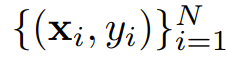

Each element Xi among N is called a feature vector. A feature vector is a vector in which each dimension j=1,…, D contains a value that describes the example in some way. Each value in the vector represents a different characteristic or feature of the example being described.

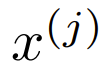

That value is called a feature and is denoted as x^(j)

<br>

### **The big Question? Classification vs Regression?**



Classification: The task of predicting a discrete category or label, where the model's output corresponds to one specific category from a predefined set.

Regression: The task of predicting a continuous value, where the model's output is a real number that can take any value within a specific range, with infinitely many possible outputs.

In our case, each example or data point in the dataset corresponds to a specific month. Each example is described by features, which include the historical sales quantity and the order dates. These features provide the information needed to analyze and predict future sales patterns.

Figure 5:

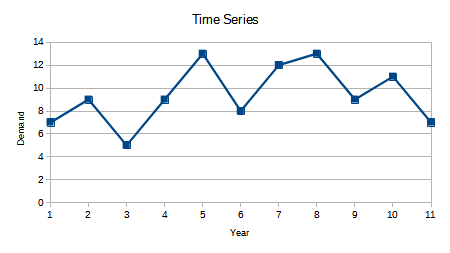

We have identified that our problem is a regression problem because we are predicting a continuous numerical value (future demand) rather than a discrete category. The figure above illustrates how our input features (x) and target variable (y) will be defined. Based on this, we will apply regression algorithms to solve the problem.

## 4.3 What Supervised Learning Algorithms are We Testing and Why?


TabPFN: This involves using a neural network that has been pre-trained on thousands of synthetic tabular datasets to learn a prior distribution over possible functions. Unlike traditional models that train from scratch on your specific data, TabPFN is a state of the art (SOTA) model which leverages transfer learning by applying this pre-trained knowledge to new tabular problems. In the context of demand forecasting, TabPFN can capture both linear and non-linear relationships between historical order dates, quantity and future demand.

<br>

Random Forest: This involves creating multiple decision trees and combining their outputs to make predictions. Sales demand can be influenced by many factors such as seasonality. Random Forest can capture these non-linear relationships between the features (e.g. order dates) and future demand.

<br>

Decision Tree: This involves splitting the dataset into subsets based on the features (e.g. order dates) and then making predictions based on the mean of the target value in each node. A decision tree can effectively partition the data based on these periodic patterns.

<br>

Linear Regression: This involves modelling the relationship between the features (e.g. order dates) and the target variable (future demand) as a linear equation. It assumes that the relationship between the target and the features is a straight line.

<br>

Gradient Boosting. This involves building decision trees sequentially, where each tree corrects the errors made by the previous tree. It focuses on the hardest-to-predict data points and refines its predictions over multiple iterations. If our sales data has complex patterns (e.g. order dates), Gradient Boosting can model these complex behaviors.

<br>

K-Nearest Neighbors (KNN): This involves finding the K most similar past instances based on historical quantity and order dates. Predictions are made by averaging the target values of these closest neighbors. Since demand patterns often repeat under similar conditions, KNN can effectively capture these recurring trends.

<br>

Support Vector Regression (SVR): This involves fitting a function that predicts demand while allowing some flexibility in error tolerance. Instead of minimizing absolute errors, SVR aims to keep most predictions within a specified margin while ignoring small variations. If sales demand data has noise or sudden fluctuations, SVR is robust and prevents extreme values from overly influencing predictions.

<br>

Lasso Regression: This involves using a linear model with L1 regularization, which not only captures the relationship between features (e.g. order dates) and demand but also removes less relevant features. By setting some feature coefficients to zero, Lasso Regression helps in focusing on the most significant factors that drive sales demand, making it useful for datasets with many variables.

<br>

Ridge Regression: This involves using a linear model with L2 regularization, meaning that it discourages overly large feature coefficients but does not eliminate them completely. Ridge Regression is useful when features are highly correlated, as it prevents any single variable from dominating the predictions while still maintaining all the relevant information.

<br>

Neural Network (NN) Regression: This involves using multiple layers of artificial neurons to model complex relationships between features (e.g. order dates) and demand. Unlike traditional models, Neural Networks can detect patterns which are harder to identify, such as interactions between promotions, seasonality, and long-term demand trends. If the sales data contains non-linear relationships, NN Regression can effectively capture these hidden patterns over time.

<br>

XGBoost: This involves building decision trees sequentially, where each tree corrects the errors of the previous one, similar to standard gradient boosting. However, XGBoost incorporates additional techniques to improve performance, such as regularization (L1 and L2), handling missing values, and parallel processing. These enhancements make XGBoost highly effective for large datasets and complex patterns. In the context of demand forecasting, XGBoost can capture non-linear relationships between order dates, and future demand. It is particularly useful when dealing with highly variable data, such as sudden demand spikes, trends, and seasonality.



## 4.4 What Regression Loss Functions Are We Comparing?

All model-based learning algorithms require a loss function, which quantifies the error or discrepancy between the predicted output and the actual result. To find the best model, we aim to minimize the loss known as the cost function.

### 4.4.1 Mean Absolute Error (MAE)

Mean absolute error (MAE) is a metric that calculates the average magnitude of the absolute errors between the predicted and actual values.

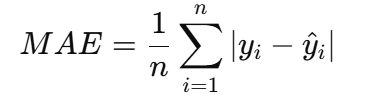

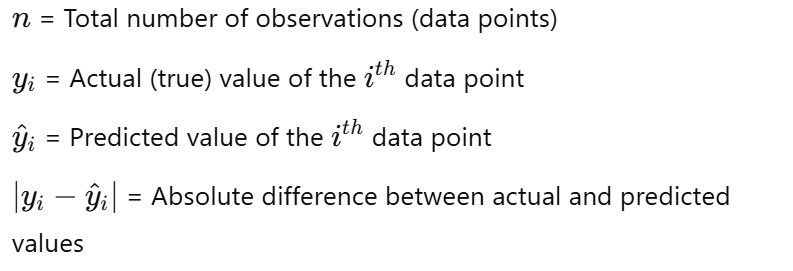

A good forecasting result will have a value closer to 0 which means that the model's prediction is close to the actual demand trend.

A high level of precision in demand forecasting will help prevent overstocking and understocking. Both scenarios can be costly which shows the importance of demand planning.


### 4.4.2 Mean Squared Error (MSE)

MSE measures the average squared difference between the actual values
and the predicted values.

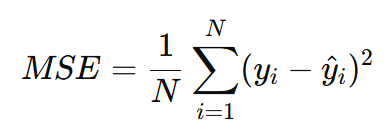

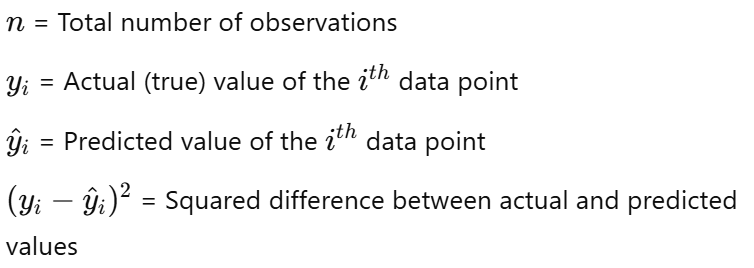

The squared term ensures that larger errors have a higher impact, meaning the model is forced to focus on reducing large deviations in predictions. When the MSE is closer to 0, the model performs better at predicting future demand.

Minimising loss is essential in demand forecasting because it helps the model accurately predict demand. This reduces the risk of costly mistakes which can negatively impact inventory costs and customer satisfaction.


###4.4.3 Root Mean Square Error (RMSE)

RMSE measures the standard deviation of the model's prediction errors.

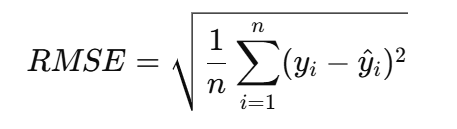

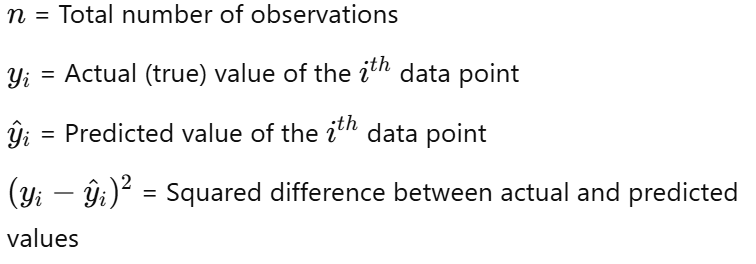

Because RMSE squares the errors, it gives more weight to large forecasting errors.

This is crucial in demand forecasting, where large errors can lead to inventory shortages or excess inventory.


### 4.4.4 R-squared

R-squared measures how well the model explains the variance in the actual data.

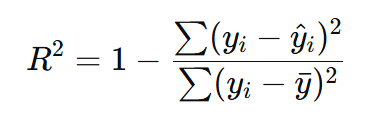

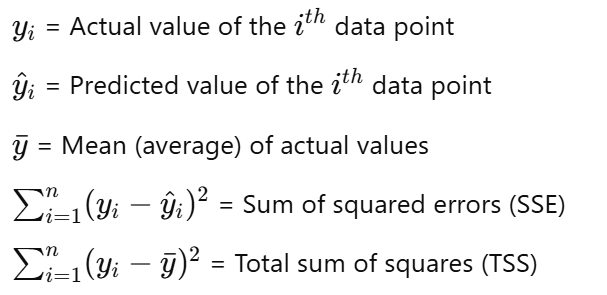

Unlike MSE, which depends on the scale of the data, R-squared is unitless, making it easier to compare models even when the target variable has different ranges.

A higher R-squared value indicates better model performance and we can think about it like a scoring system:

*   R-squared greater than 0.9 is an A
*   R-squared above 0.8 is a B
*   R-squared less than 0.7 is a fail




## 4.5 Running and Comparing the Models

Before we compare the other models, we want to establish the benchmark. TabPFN (Tabular Prior-data Fitted Networks) is a transformer-based model specifically designed for tabular data prediction tasks. It's considered a state-of-the-art (SOTA) model for many tabular data problems.

By running TabPFN first, we want to establish a reasonable upper bound on performance expectations. In addition, we test TabPFN first because such SOTA models typically require much longer execution times.

If any of our other models approaches or exceeds TabPFN's performance, it is generally considered a strong result as TabPFN generally outperforms carefully tuned traditional models on many tabular datasets.

We would split the dataset into training and testing sets using a 20% test size, ensuring reproducibility with a fixed random seed. It then initializes the TabPFNRegressor and fits the model on the training data. After training, the model makes predictions on the test set. It will then evaluate the model's performance by calculating several metrics such as MAE, MSE, RMSE, and R-squared. These metrics provide insight into the model's accuracy and how well it predicts the target variable.


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the TabPFN Regressor
reg = TabPFNRegressor()

# Fit the model
reg.fit(X_train, y_train)

# Make predictions
preds = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)  # Calculate RMSE as square root of MSE
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\nTabPFN Model Evaluation Results:")
print('Mean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²):', r2)



TabPFM Model Evaluation Results:
Mean Squared Error (MSE): 6.566976547241211
Mean Absolute Error (MAE): 1.3636839389801025
Root Mean Squared Error (RMSE): 2.5626112750944516
R-squared (R²): 0.9322490692138672


Above are our established metrics to compare with other models

<br>

**Why are we using TabPFN as a baseline?**

Unlike traditional machine learning models that require extensive hyperparameter tuning, TabPFN is a pre-trained, transformer-based probabilistic model designed specifically for tabular data. It has been trained on 130 million synthetically generated datasets.

Our next step is hyperparameter tuning. While TabPFN requires minimal tuning, SOTA models may only offer marginally better performance in some cases. However, the trade-off in runtime and computational cost may not always justify these improvements.

At this stage, we aim to evaluate and improve our traditional models to determine if they can match or exceed TabPFN’s performance. These traditional models could provide alternative solutions and options for our task.


<br>

We will first test and evaluate all traditional models.

<IPython.core.display.Javascript object>

Training Random Forest...
Training Decision Tree...
Training Linear Regression...
Training Gradient Boosting...
Training KNN...
Training SVR...
Training Lasso Regression...
Training Ridge Regression...
Training NN Regression...
Training XGBoost...

Model Performance Metrics (sorted by RMSE):
                        MAE        MSE      RMSE  R² Score
XGBoost            1.815619   8.094814  2.845139  0.916487
Random Forest      1.774301   8.437058  2.904661  0.912956
Gradient Boosting  2.102807   9.140236  3.023282  0.905701
Decision Tree      2.658407  19.118584  4.372480  0.802755
NN Regression      3.483143  21.799559  4.669000  0.775096
KNN                3.769204  27.670088  5.260237  0.714530
Lasso Regression   4.444812  30.768135  5.546903  0.682568
Ridge Regression   4.495109  31.123957  5.578885  0.678897
Linear Regression  4.497251  31.160194  5.582132  0.678523
SVR                6.431197  63.966941  7.997934  0.340059


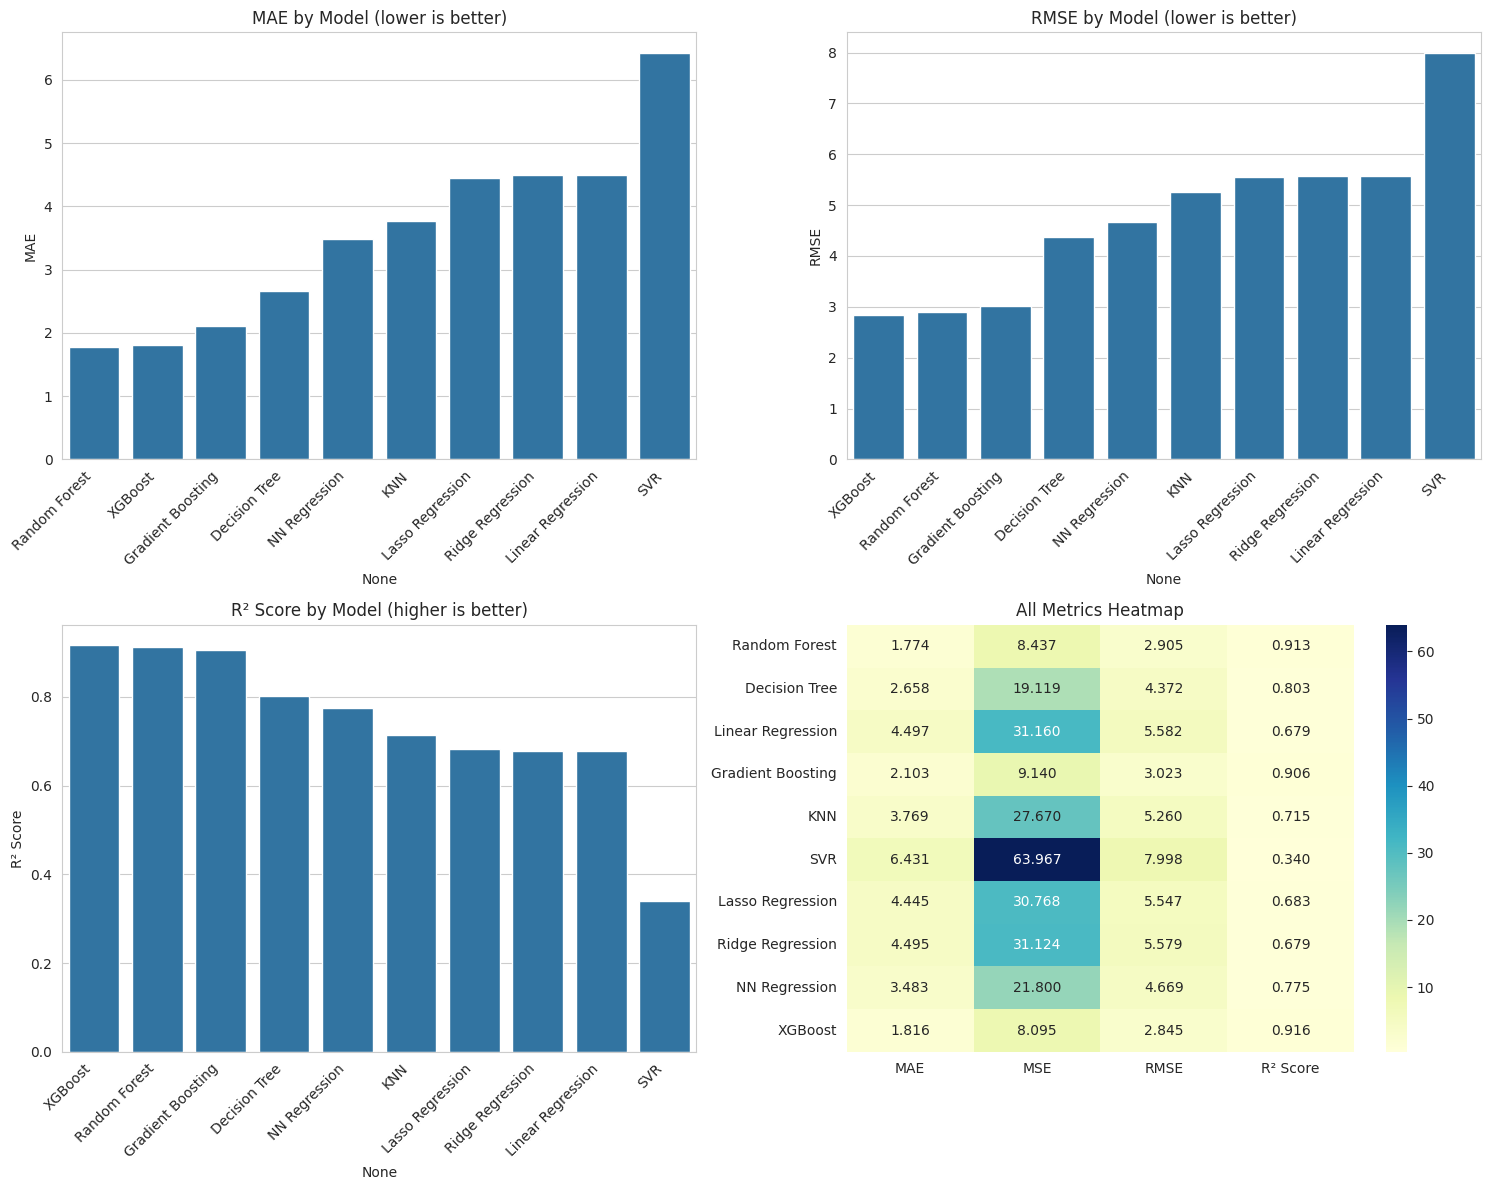

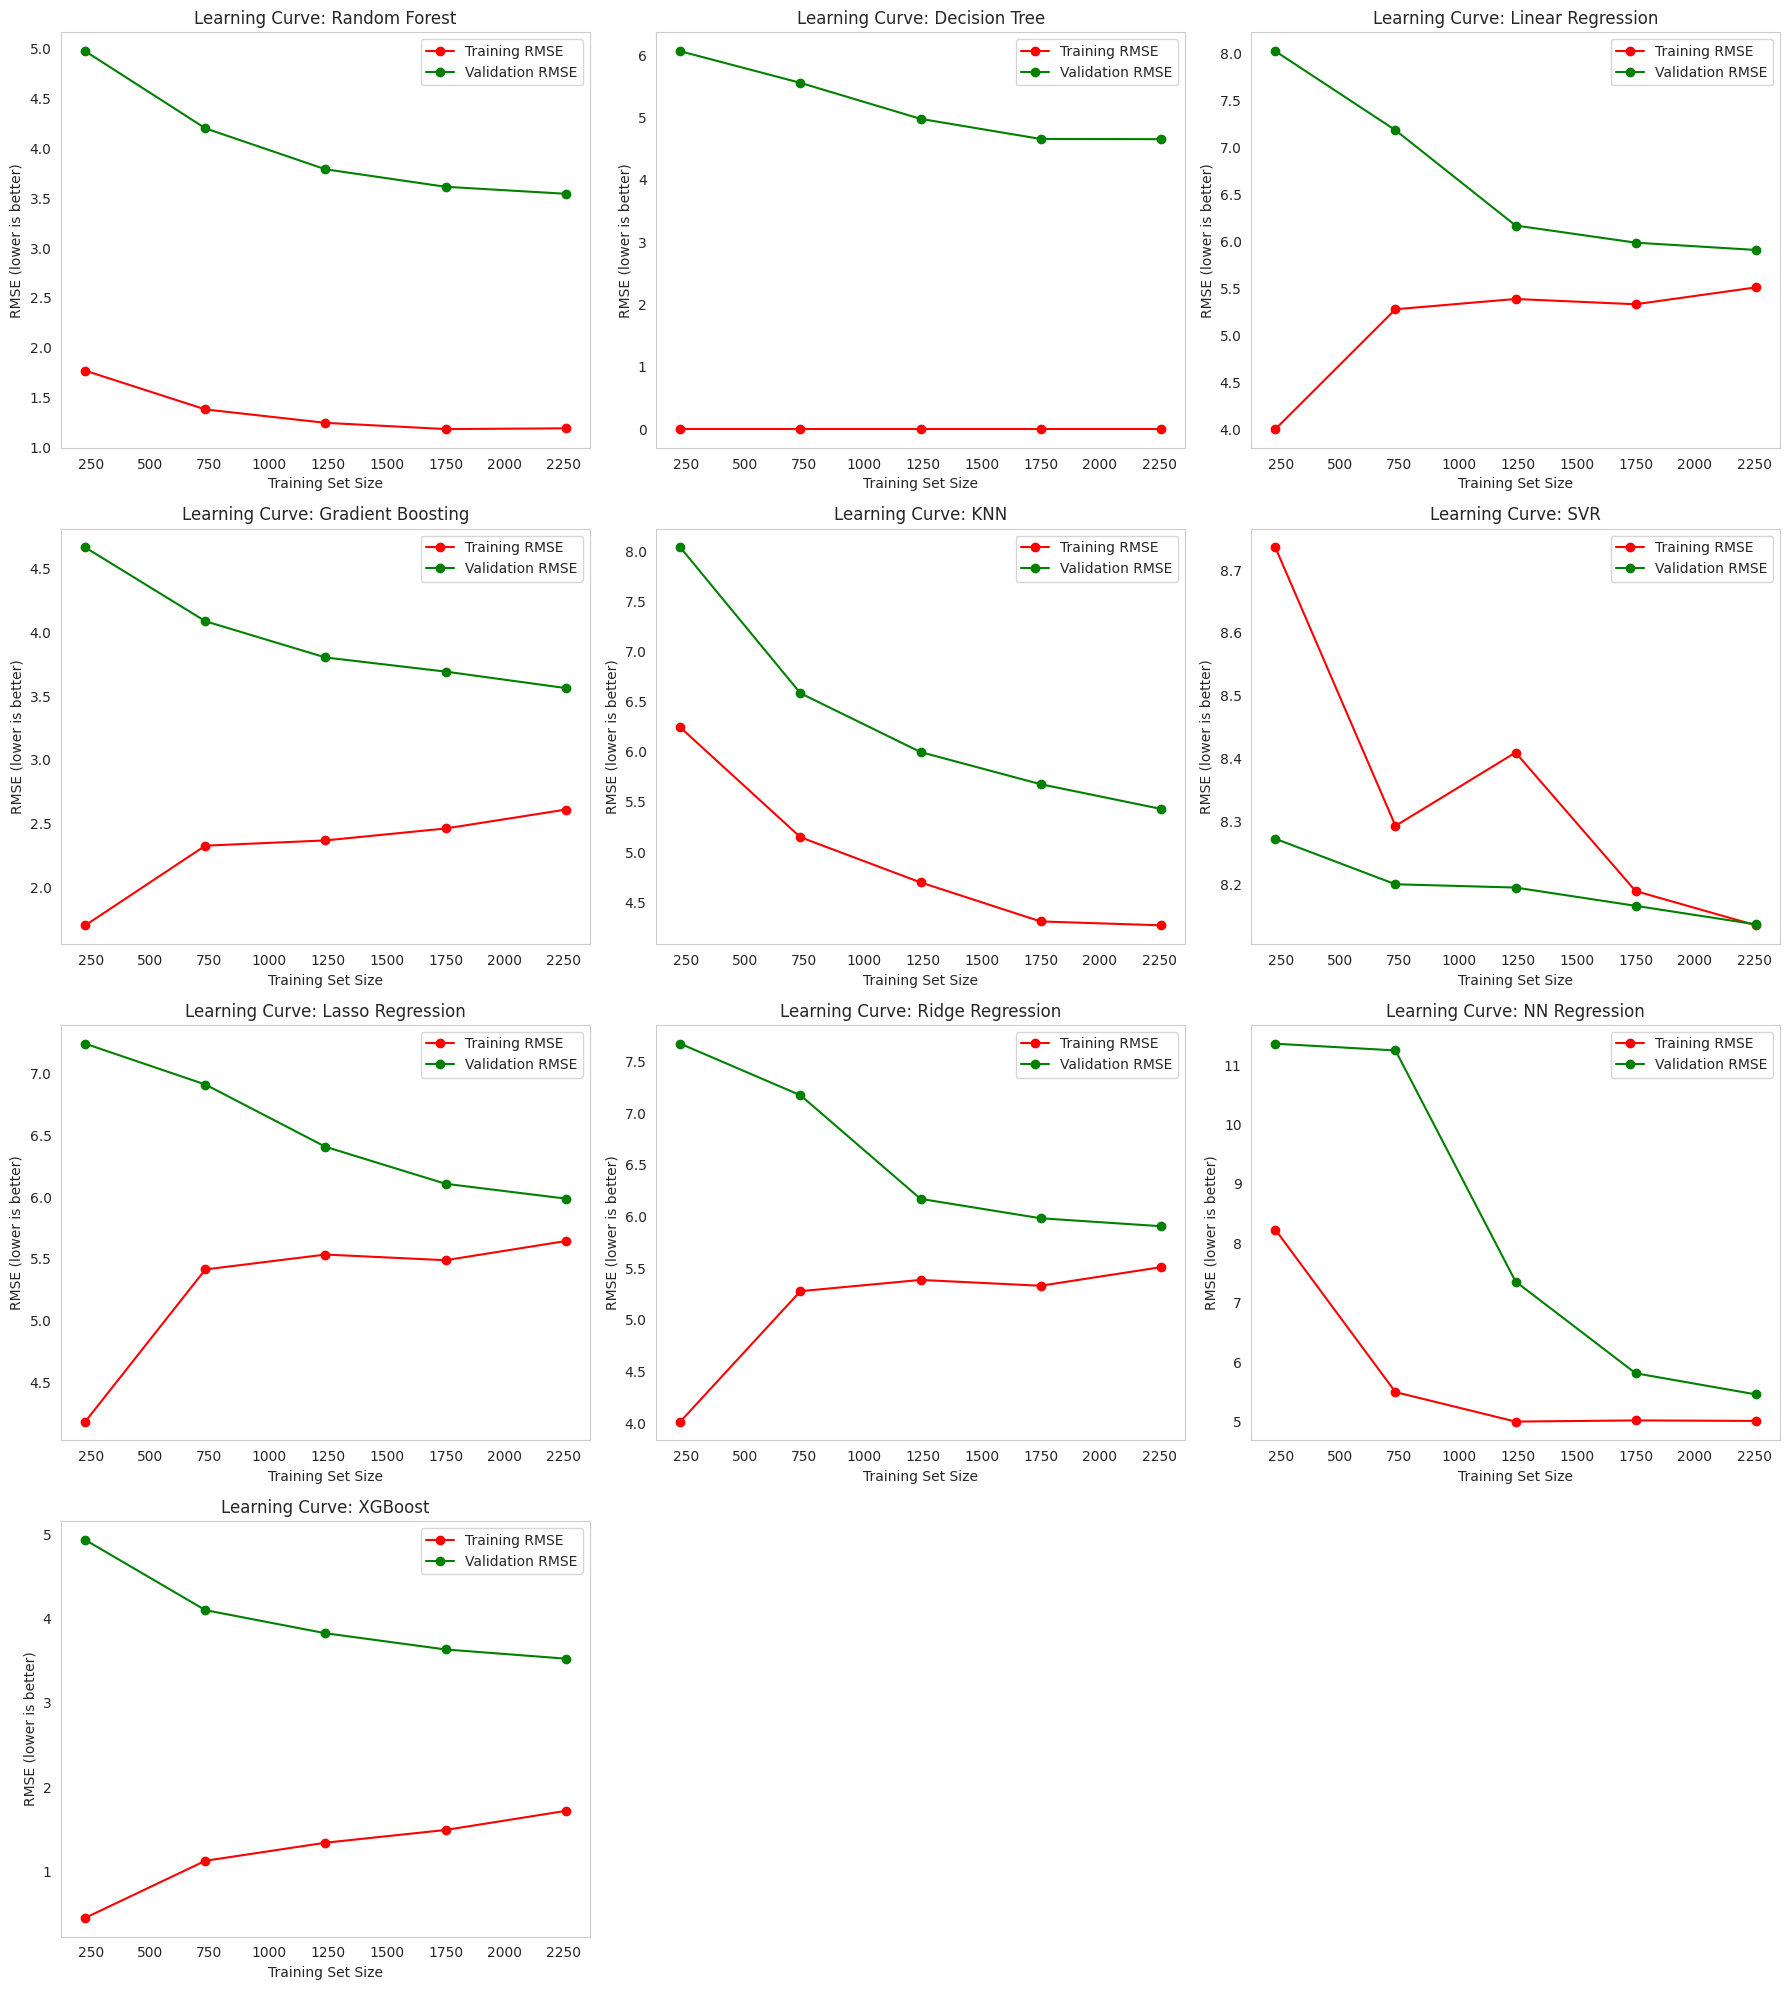

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

# Our models are using the default parameters
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf'),
    "Lasso Regression": Lasso(alpha=0.01),
    "Ridge Regression": Ridge(alpha=0.1),
    "NN Regression": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

results = {}

# Model Ranking Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R² Score": r2}

# Model Training and Other Graphs for Analysis
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    results[name] = evaluate_model(model, X_test, y_test)

results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics (sorted by RMSE):")
print(results_df.sort_values("RMSE"))

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sorted_results = results_df.sort_values('MAE')
sns.barplot(x=sorted_results.index, y=sorted_results['MAE'])
plt.title('MAE by Model (lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2, 2, 2)
sorted_results = results_df.sort_values('RMSE')
sns.barplot(x=sorted_results.index, y=sorted_results['RMSE'])
plt.title('RMSE by Model (lower is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2, 2, 3)
sorted_results = results_df.sort_values('R² Score', ascending=False)
sns.barplot(x=sorted_results.index, y=sorted_results['R² Score'])
plt.title('R² Score by Model (higher is better)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(2, 2, 4)
sns.heatmap(results_df, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('All Metrics Heatmap')
plt.tight_layout()

plt.savefig('model_comparison_metrics.png')
plt.show()


def plot_learning_curve(model, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_root_mean_squared_error',
        train_sizes=train_sizes, n_jobs=-1)

    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training RMSE')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation RMSE')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE (lower is better)')
    plt.grid()
    plt.legend(loc="best")
    return plt

n_models = len(models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, (name, model) in enumerate(models.items()):
    plt.subplot(n_rows, n_cols, i + 1)
    plot_learning_curve(model, f'Learning Curve: {name}', X, y)

plt.tight_layout()
plt.savefig('all_models_learning_curves.png')
plt.show()

Based on the results above, we can observe that the top three traditional models are already performing close to how well TabPFN was performing. Additionally from the line chart, the learning curves of each model provide insights into their learning patterns. Notably, KNN shows the most similar learning curve between its training and validation RMSE, indicating its consistent performance across both sets.

As explained previously, MAE, MSE, RMSE and R² scores are used to measure the model performances. Line chart is used to rank the different models based on RMSE as we find that it is ideal for demand forecasting. This is because RMSE penalizes large errors more than MAE, helping mitigate the risks associated with stockouts or overstocking.

Unlike MSE, RMSE is in the same unit as the target variable (demand), making it easier to interpret. Since RMSE is the square root of MSE, it brings the error measurement back to the same units as demand, balancing error sensitivity with interpretability by addressing the squaring issue present in MSE.

From the results, we can see that XGBoost has the lowest MSE, lowest RMSE, and highest R² score. This is a good result as it indicates that XGBoost makes fewer large errors and explains the variance in the data better than the other models.

Although Random Forest has a slightly better MAE, its performance across the other metrics is not significantly better than XGBoost. Furthermore, there is a small margin of difference for Gradient Boosting for all loss functions. Thus, we conclude that it is still too early to definitively choose the best model.

<br><br>

With that in mind, we want to analyse one more statistic to ascertain the usefulness of all the traditional models by comparing the standard deviation from all loss functions. This involves training and comparing all models with K-Fold Cross-Validation, ensuring that our results are robust and not dependent on a single train-test split.


                   MAE Mean  MAE Std Dev   MSE Mean  MSE Std Dev  RMSE Mean  RMSE Std Dev   R² Mean  R² Std Dev
SVR                6.509890     0.132859  66.661629     1.914056   8.163810      0.117606  0.293693    0.033724
Decision Tree      2.679403     0.078535  18.500661     1.154875   4.299128      0.134743  0.803857    0.016090
KNN                3.783572     0.144098  28.737523     2.211508   5.356737      0.207111  0.696011    0.019724
Gradient Boosting  2.121334     0.097932  10.174689     1.494888   3.181904      0.224003  0.892269    0.015795
XGBoost            1.945179     0.125859   9.735154     1.445787   3.112015      0.224765  0.896815    0.015898
Random Forest      1.900975     0.127858  10.248815     1.688769   3.191164      0.255509  0.891390    0.018316
Lasso Regression   4.603201     0.153089  35.174749     3.855741   5.922015      0.323244  0.627720    0.039307
NN Regression      3.322888     0.120252  22.445073     3.083146   4.726126      0.329862  0.762411    0

<Figure size 1000x600 with 0 Axes>

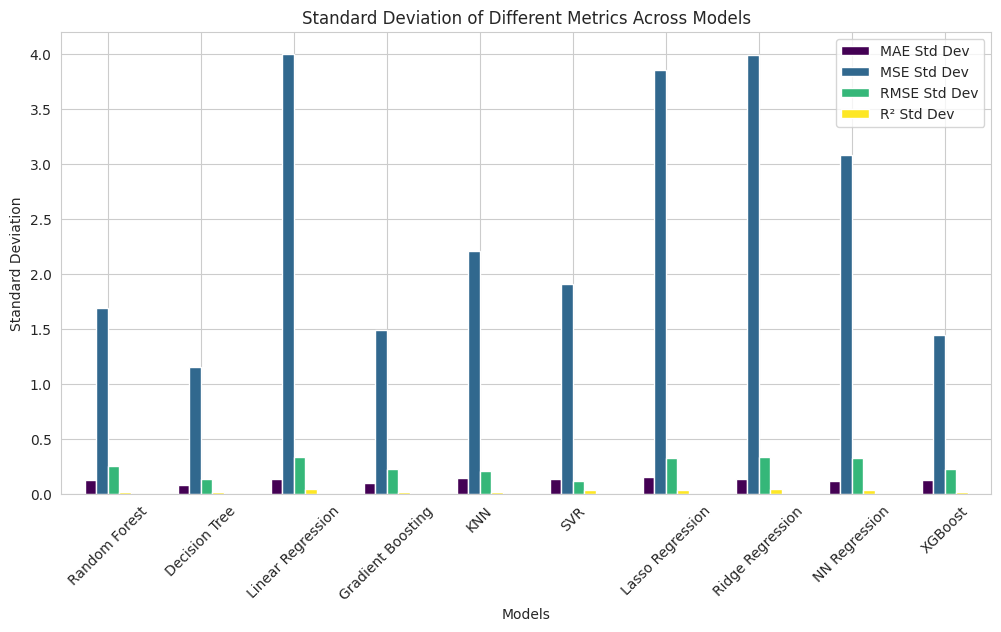

In [ ]:
results = {}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

def evaluate_model(model, X, y):
    mae_list, mse_list, rmse_list, r2_list = [], [], [], []

    # cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mae_list.append(mean_absolute_error(y_test, y_pred))
        mse_list.append(mean_squared_error(y_test, y_pred))
        rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
        r2_list.append(r2_score(y_test, y_pred))

    return {
        'MAE Mean': np.mean(mae_list), 'MAE Std Dev': np.std(mae_list),
        'MSE Mean': np.mean(mse_list), 'MSE Std Dev': np.std(mse_list),
        'RMSE Mean': np.mean(rmse_list), 'RMSE Std Dev': np.std(rmse_list),
        'R² Mean': np.mean(r2_list), 'R² Std Dev': np.std(r2_list)
    }

# Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf'),
    "Lasso Regression": Lasso(alpha=0.01),
    "Ridge Regression": Ridge(alpha=0.1),
    "NN Regression": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

for name, model in models.items():
    results[name] = evaluate_model(model, X, y)  # Evaluate on the full dataset using cross-validation

results_df = pd.DataFrame(results).T

print(results_df.sort_values("RMSE Std Dev", ascending=True))  # Sorting by RMSE mean (lower is better)

std_dev_df = results_df[['MAE Std Dev', 'MSE Std Dev', 'RMSE Std Dev', 'R² Std Dev']]

plt.figure(figsize=(10, 6))
std_dev_df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Standard Deviation of Different Metrics Across Models')
plt.ylabel('Standard Deviation')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)
plt.show()

<br>

**Why are we computing the standard deviation from these loss functions?**

<br>

We are doing this to gain more insight into the models. For example, a model with a low RMSE indicates that the model has "good" performance over the whole dataset. However, if the same model also has a low RMSE standard deviation, it indicates that the model has a consistent performance.<br><br>

Considering the standard deviation, SVR has the most consistent performance. However, as previously observed, its high MAE, MSE and RMSE indicate a poor choice in terms of model accuracy.<br><br>

XGBoost shows lower variability as compared to Random Forest and Gradient Boosting, implying that it performs more uniformly across the dataset. However, it is still premature to make a definitive model recommendation. At this point, we ascertain that XGBoost, Random Forest, and Gradient Boosting remain strong candidates for further exploration, which will be our focus moving forward.

<br><br>

Next, we want to measure the level of discrepancy between the loss function and actual values. We will calculate the average QUANTITYORDERED from the input data and use it as a benchmark for comparing the Mean Absolute Error (MAE). The aim is to achieve a benchmark lower than 10% of the average QUANTITYORDERED.

In this part, we are comparing the MAE isntead of the RMSE for efficiency purposes as it provides a straightforward measure of prediction error without being overly sensitive to outliers as compared to other loss functions. The goal is to assess the top three models' overall performance for normal cases, without being disproportionately influenced by extreme values.





In [ ]:
# Define top 3 models
xgboost = "XGBoost"
random_forest = "Random Forest"
gradient_boosting = "Gradient Boosting"

average_quantity_ordered = monthly_demand["QUANTITYORDERED"].mean()

xgboost_mae = results_df.loc[xgboost, "MAE"]
random_forest_mae = results_df.loc[random_forest, "MAE"]
gradient_boosting_mae = results_df.loc[gradient_boosting, "MAE"]

xgboost_mae_percentage = (xgboost_mae / average_quantity_ordered) * 100
random_forest_mae_percentage = (random_forest_mae / average_quantity_ordered) * 100
gradient_boosting_mae_percentage = (gradient_boosting_mae / average_quantity_ordered) * 100

# Display results
print("Average QUANTITYORDERED:", average_quantity_ordered)
print("\nMAE for XGBoost:", xgboost_mae)
print("Percentage of MAE relative to Average QUANTITYORDERED for XGBoost: {:.2f}%".format(xgboost_mae_percentage))
print("\nMAE for Random Forest:", random_forest_mae)
print("Percentage of MAE relative to Average QUANTITYORDERED for Random Forest: {:.2f}%".format(random_forest_mae_percentage))
print("\nMAE for Gradient Boosting:", gradient_boosting_mae)
print("Percentage of MAE relative to Average QUANTITYORDERED for Gradient Boosting: {:.2f}%".format(gradient_boosting_mae_percentage))

Average QUANTITYORDERED: 35.09280906836698

MAE for XGBoost: 1.8156187534332275
Percentage of MAE relative to Average QUANTITYORDERED for XGBoost: 5.17%

MAE for Random Forest: 1.7743008849557522
Percentage of MAE relative to Average QUANTITYORDERED for Random Forest: 5.06%

MAE for Gradient Boosting: 2.1028073851824884
Percentage of MAE relative to Average QUANTITYORDERED for Gradient Boosting: 5.99%


Both XGBoost and Random Forest are performing well, as their MAE values are relatively low and the percentage discrepancy are within 10%. This means both models are making accurate predictions and we will be focusing on evaluating and improving these two models.

However, Random Forest has a slightly better performance with a lower MAE percentage (5.06%) compared to XGBoost's (5.17%). Since both models meet our accuracy benchmark, Random Forest appears to be the more reliable choice for minimising prediction errors.

Hence, we will plot the residuals (the difference between actual and predicted values) chart for the 3 model which would help us visualise the model performance more clearly. Ideally, the residuals should be randomly scattered with no discernible pattern.


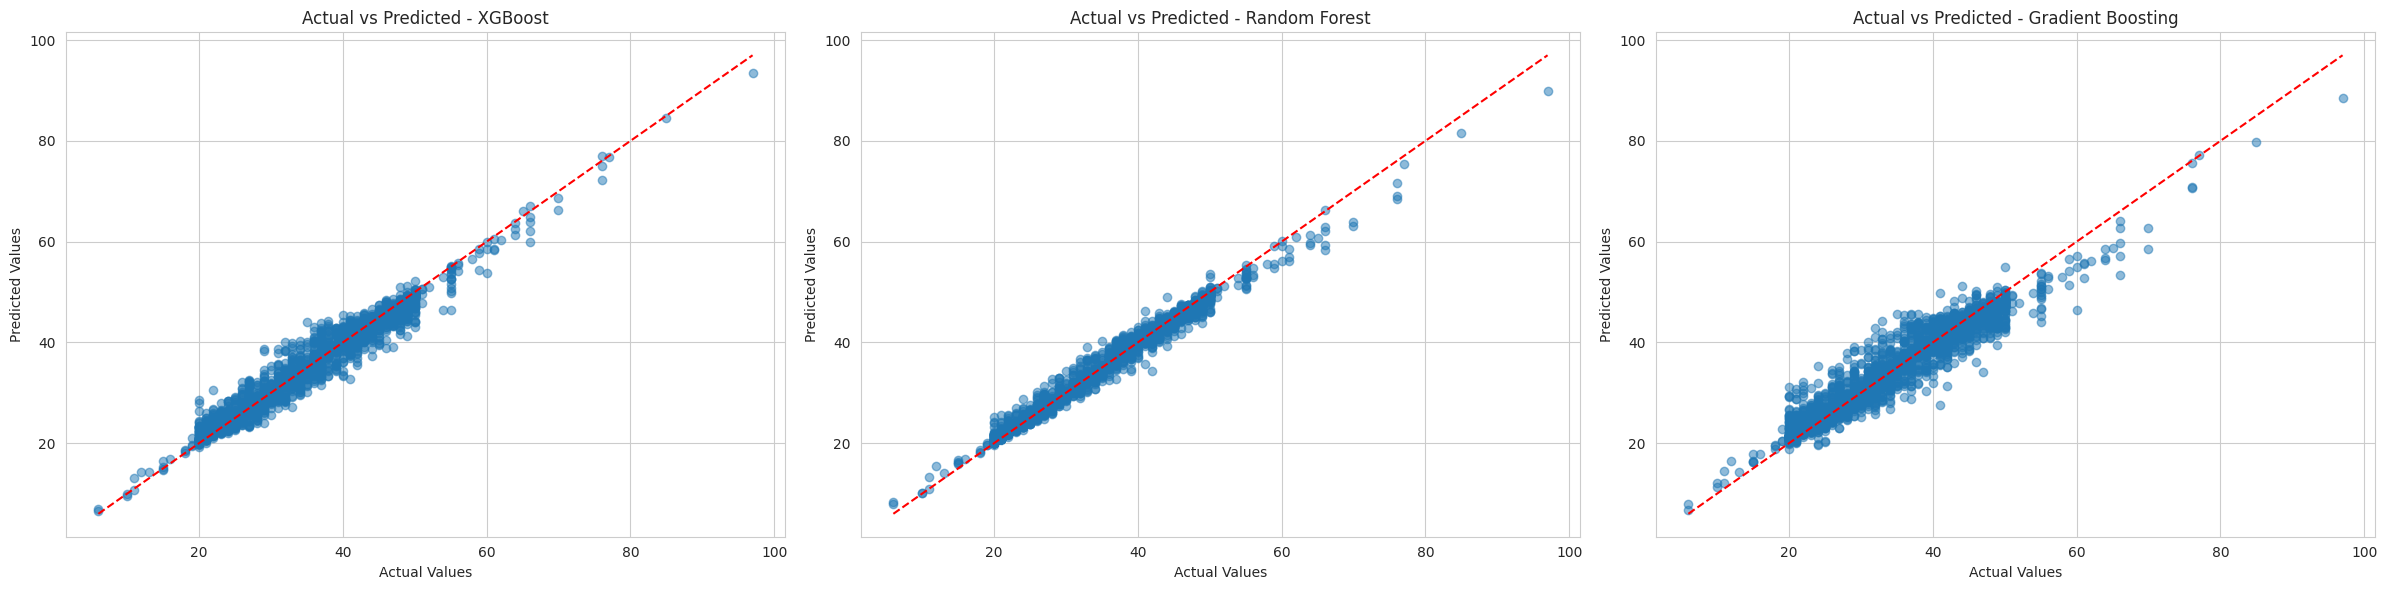

In [ ]:
def plot_actual_vs_predicted(model_names):
    plt.figure(figsize=(24, 6))

    for i, model_name in enumerate(model_names, 1):
        model = models[model_name]
        model.fit(X, y)
        y_pred = model.predict(X)

        plt.subplot(1, 3, i)
        plt.scatter(y, y_pred, alpha=0.5)
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title(f'Actual vs Predicted - {model_name}')

    plt.tight_layout()
    plt.show()

model_list = ["XGBoost", "Random Forest", "Gradient Boosting"]
plot_actual_vs_predicted(model_list)


**Chart 1: Actual vs Predicted**

The scatter plot indicates that all models maintain fairly consistent prediction accuracy across different value ranges, with a similar spread around the diagonal line throughout most of the distribution.

For the highest values (60+), there appears to be some underestimation. There is an outlier on the far right (around 100) on all charts which indicates the actual value is significantly higher than the model's prediction. Despite this, the chart suggests that all models remain highly accurate overall.

Visually, Random Forest is the best model as the points are more closely clustered along the line.


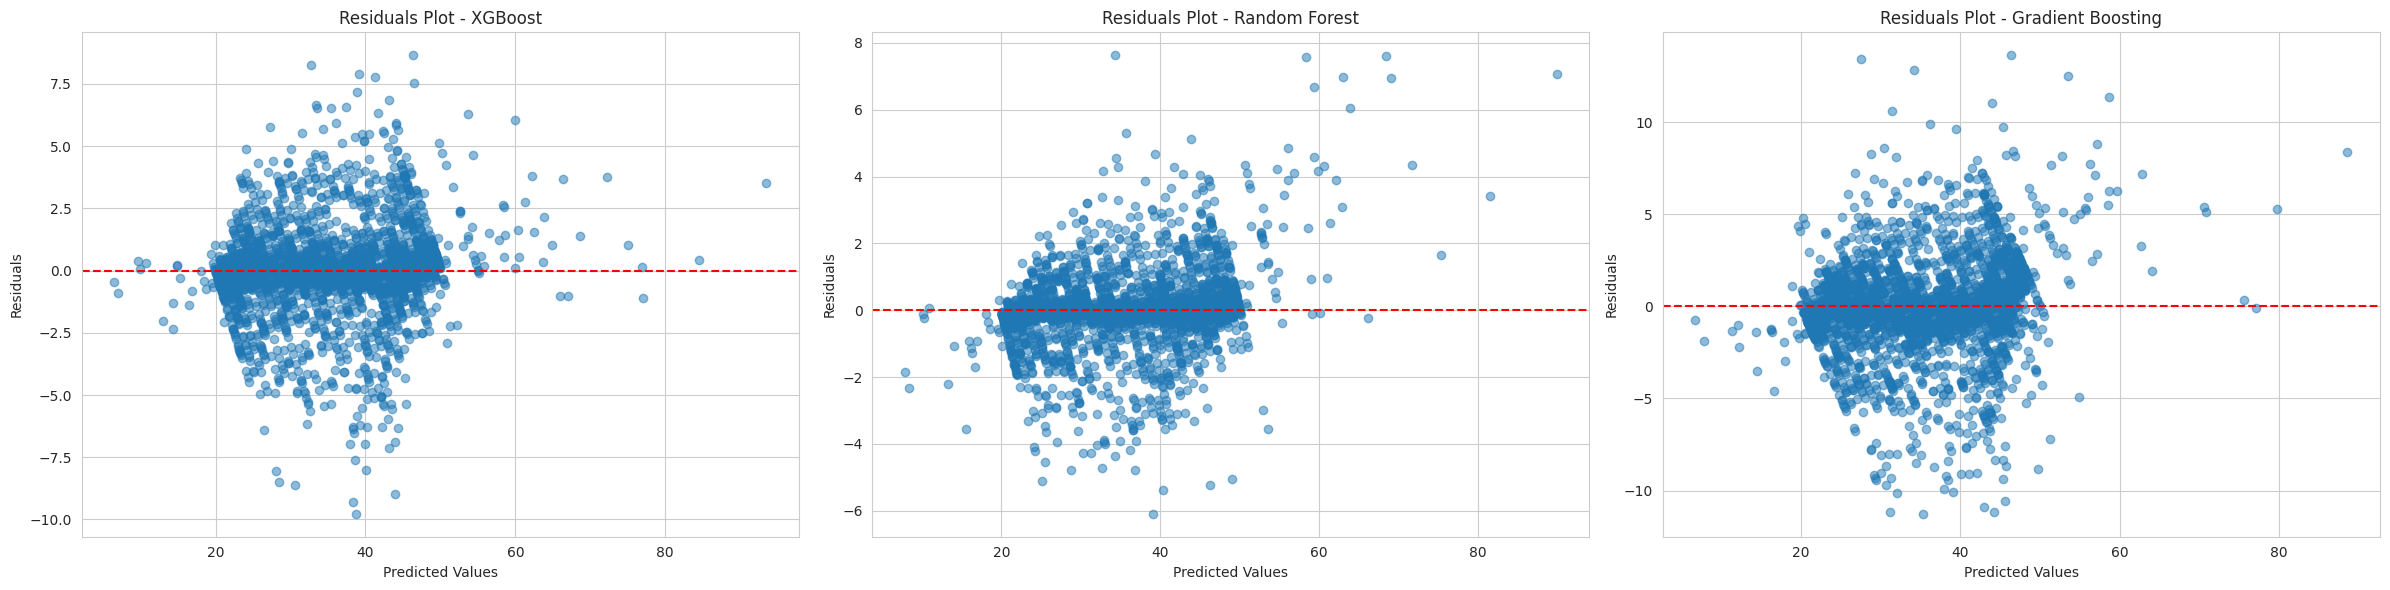

In [ ]:
def plot_residuals_scatter(model_names):
    plt.figure(figsize=(24, 6))

    for i, model_name in enumerate(model_names, 1):
        model = models[model_name]
        model.fit(X, y)
        y_pred = model.predict(X)
        residuals = y - y_pred

        plt.subplot(1, 3, i)
        plt.scatter(y_pred, residuals, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel('Predicted Values')
        plt.ylabel('Residuals')
        plt.title(f'Residuals Plot - {model_name}')

    plt.tight_layout()
    plt.show()

model_list = ["XGBoost", "Random Forest", "Gradient Boosting"]
plot_residuals_scatter(model_list)

**Chart 2: Residuals Plot**

For all the models, the residuals show a slight "fan" shape as predicted values increase, meaning the spread of errors becomes wider at higher predicted values. This pattern indicates heteroscedasticity, a concept we learned in this project, where the variance of errors grows as predictions increase.

For higher predicted values (60+), there are more positive residuals than negative ones, suggesting that the model tends to underestimate larger values especially for Gradient Boosting. This is an area we will explore further in the next phase.

Visually, Random Forest is the best as most of the datapoints are more closely clustered.

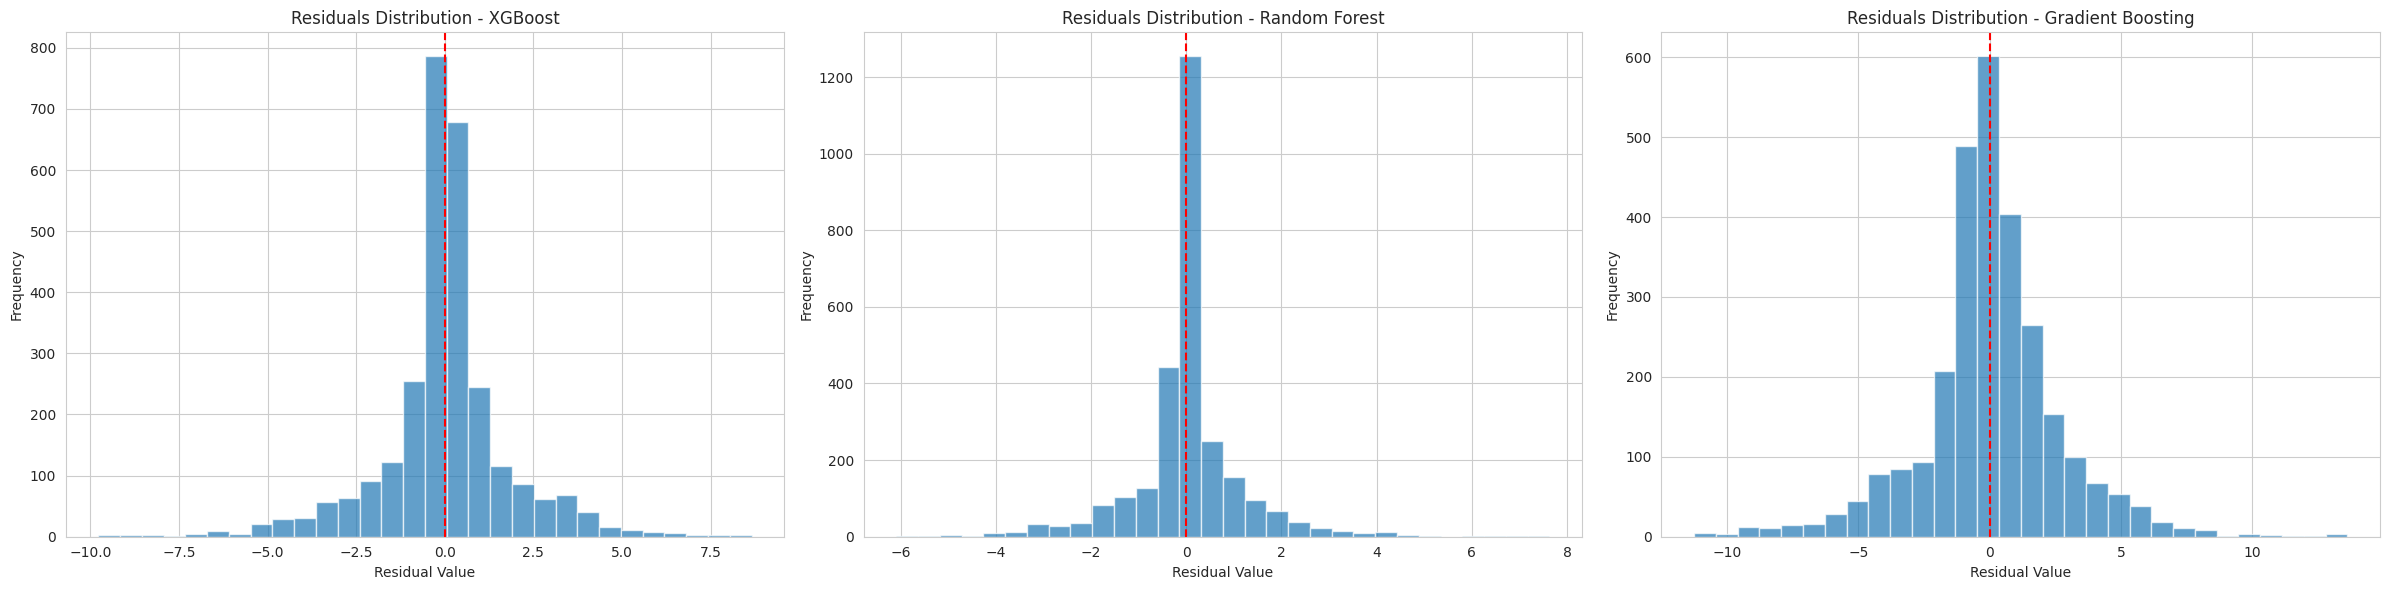

In [ ]:
def plot_residuals_distribution(model_names):
   plt.figure(figsize=(24, 6))

   metrics_dict = {}

   for i, model_name in enumerate(model_names, 1):
       model = models[model_name]
       model.fit(X, y)
       y_pred = model.predict(X)
       residuals = y - y_pred

       plt.subplot(1, 3, i)
       plt.hist(residuals, bins=30, alpha=0.7)
       plt.axvline(x=0, color='r', linestyle='--')
       plt.xlabel('Residual Value')
       plt.ylabel('Frequency')
       plt.title(f'Residuals Distribution - {model_name}')

       mae = mean_absolute_error(y, y_pred)
       mse = mean_squared_error(y, y_pred)
       rmse = np.sqrt(mse)
       r2 = r2_score(y, y_pred)

       metrics_dict[model_name] = {
           'MAE': mae,
           'MSE': mse,
           'RMSE': rmse,
           'R²': r2
       }

   plt.tight_layout()
   plt.show()

   return metrics_dict

model_list = ["XGBoost", "Random Forest", "Gradient Boosting"]
metrics = plot_residuals_distribution(model_list)



**Chart 3: Distribution of Residuals**

For all models, the tight clustering of residuals around zero, with a tall peak, suggests that Random Forest is performing well overall, with most predictions being close to the actual values.

For XGBoost, most residuals fall between -10 and +10 and there are some outliers extending to around +30. These represent cases where the model significantly underestimated the actual values. The slightly taller left skew suggests we should investigate those casescases with larger negative residuals in the next phase.

Random Forest appears to perform better than Gradient Boosting, as its residual range is smaller. However, both models show a slightly taller right skew, indicating a tendency to overestimate actual values. Addressing these larger positive residuals will be a key focus moving forward. <br><br>

In conclusion, we now have a clear understanding of how each model performs, allowing us to refine and optimize them further using hyperparameter tuning in the next phase.


# 5. Identify Hyperparameters and Perform Tuning

Hyperparameters are predefined properties that influence how a learning algorithm operates. Unlike model parameters, which are learned from data during training, hyperparameters must be set before the learning process begins.

Rather than manually selecting these values, we will use programming techniques to identify the optimal set of hyperparameters, which improves the model performance and efficiency.


##5.1 Hyperparameter Consolidated Import Statements

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from IPython.display import display
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

## 5.2 Feature Importance Study

<u> Feature Importance </u>

In this step, we will analyze the significance of various features in predicting demand using three learning models: Random Forest Regressor, XGBoost Regressor, and Gradient Boosting Regressor. By evaluating feature importance across multiple models, we aim to identify the most influential predictors that contribute to demand forecasting accuracy.

Previously, we dropped irrelevant columns based on our problem statement and only focused on selected features. However, in this step, we are considering all available features to reduce dimensionality, reduce the risk of bias and improve model performance. This also enables a review of the most significant features influencing demand prediction, ensuring that no critical variables are overlooked.


The three different models are trained to identify diverse feature relationships and assign feature importance scores based on their impact on predictions. These importance scores are stored in separate DataFrames and displayed side-by-side for comparison.

Additionally, we created side-by-side comparison bar chart to visualise the top 10 features with the highest average importance scores and display how they differ between the models for each feature. This allows us to highlight consistent patterns by cross-verifying which features consistently rank high across the models.

<IPython.core.display.Javascript object>

Feature Importance Comparison Across Models:
                      Feature  RF_Importance                  Feature  XGB_Importance                      Feature  GB_Importance
0                       SALES       0.593180                PRICEEACH        0.210600                        SALES       0.680967
1                   PRICEEACH       0.268539                    SALES        0.186449                    PRICEEACH       0.243616
2                        MSRP       0.068043                     MSRP        0.096172                         MSRP       0.060040
3                     DATE_ID       0.010941     PRODUCTCODE_S18_4668        0.029239     AVG_QUANTITY_PER_PRODUCT       0.004876
4    AVG_QUANTITY_PER_PRODUCT       0.009903     PRODUCTCODE_S24_4258        0.016260                     MONTH_ID       0.002608
..                        ...            ... ..                   ...             ... ..                       ...            ...
131      PRODUCTCODE_S72_1253       0.000010 

<Figure size 1500x800 with 0 Axes>

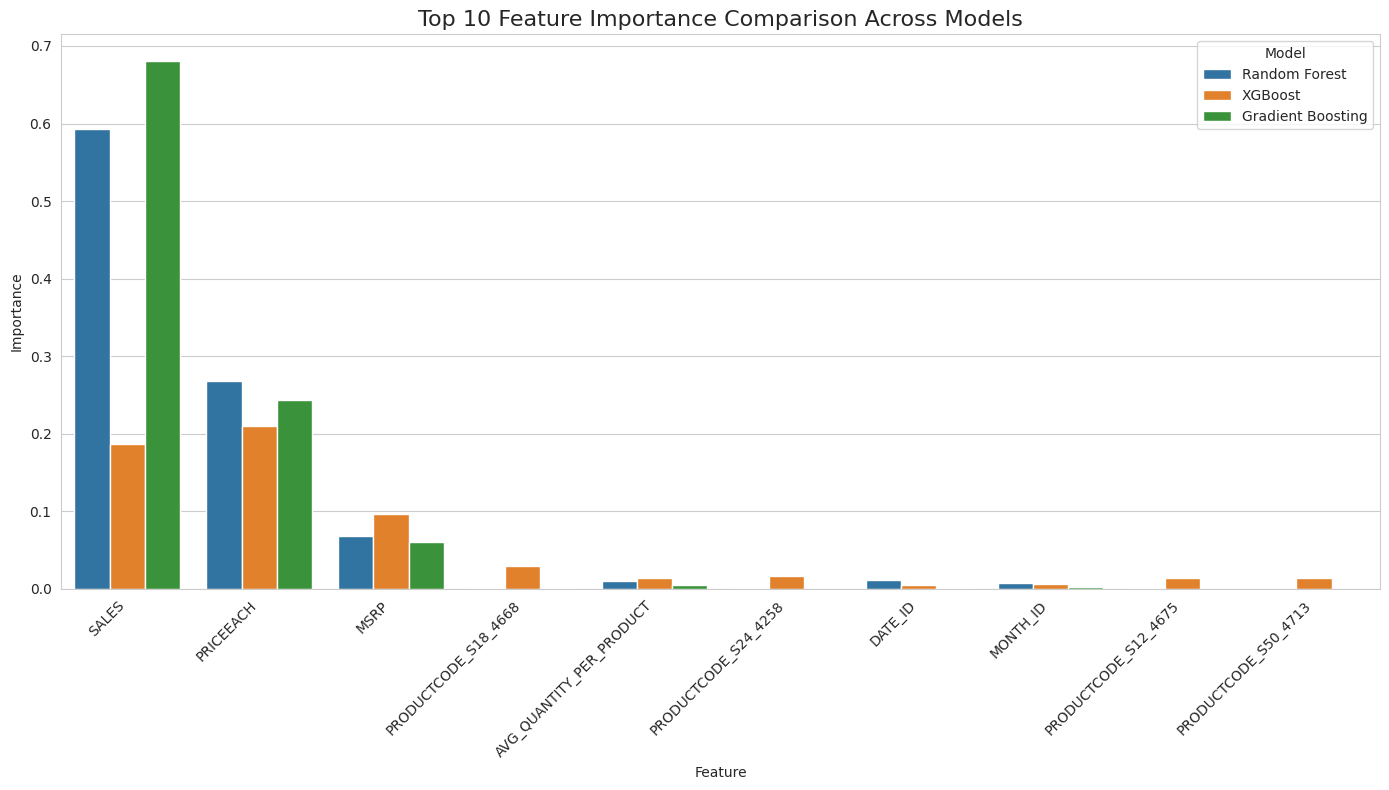

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

# Train top 3 models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_importance = rf_model.feature_importances_

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_importance = xgb_model.feature_importances_

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_importance = gb_model.feature_importances_

rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'RF_Importance': rf_importance
}).sort_values(by='RF_Importance', ascending=False)

xgb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'XGB_Importance': xgb_importance
}).sort_values(by='XGB_Importance', ascending=False)

gb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'GB_Importance': gb_importance
}).sort_values(by='GB_Importance', ascending=False)

rf_importance_df = rf_importance_df.reset_index(drop=True)
xgb_importance_df = xgb_importance_df.reset_index(drop=True)
gb_importance_df = gb_importance_df.reset_index(drop=True)

combined_df = pd.concat(
    [
        rf_importance_df,
        pd.DataFrame({' ': [' '] * len(rf_importance_df)}),
        xgb_importance_df,
        pd.DataFrame({'  ': [' '] * len(rf_importance_df)}),
        gb_importance_df
    ],
    axis=1
)

print("Feature Importance Comparison Across Models:")
print(combined_df)

plt.figure(figsize=(15, 8))

top_features = pd.DataFrame({
    'Feature': X_train.columns,
    'Avg_Importance': (rf_importance + xgb_importance + gb_importance) / 3
}).sort_values(by='Avg_Importance', ascending=False).head(10)['Feature'].values

top_rf = rf_importance_df[rf_importance_df['Feature'].isin(top_features)]
top_xgb = xgb_importance_df[xgb_importance_df['Feature'].isin(top_features)]
top_gb = gb_importance_df[gb_importance_df['Feature'].isin(top_features)]

plot_df = pd.DataFrame({
    'Feature': top_features,
    'Random Forest': [rf_importance_df[rf_importance_df['Feature'] == feat]['RF_Importance'].values[0] for feat in top_features],
    'XGBoost': [xgb_importance_df[xgb_importance_df['Feature'] == feat]['XGB_Importance'].values[0] for feat in top_features],
    'Gradient Boosting': [gb_importance_df[gb_importance_df['Feature'] == feat]['GB_Importance'].values[0] for feat in top_features]
})

plot_df_melt = pd.melt(plot_df, id_vars=['Feature'],
                     value_vars=['Random Forest', 'XGBoost', 'Gradient Boosting'],
                     var_name='Model', value_name='Importance')

import seaborn as sns
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='Feature', y='Importance', hue='Model', data=plot_df_melt)
plt.title('Top 10 Feature Importance Comparison Across Models', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The feature importance comparison reveals that SALES is the most important feature for Random Forest and Gradient Boosting, with importance scores of 0.593 and 0.681, respectively. However, for XGBoost, PRICEEACH is the most important feature with an importance of 0.211. Other notable features include PRICEEACH and MSRP, which are highly important across all models but with varying degrees of significance. AVG_QUANTITY_PER_PRODUCT and DATE_ID appear to be less influential but has an overall higher importance. <br><br>

Using SALES as a prediction feature validates our hypothesis that SALES is the key factor influencing future demand, as our understanding of supply chain management suggests it can be appropriate. Past sales figures often reflect customer demand, which can help forecast future order quantities and optimize supply chain decisions. This alignment supports the reliability of the feature importance results.

Our next step is to retrain the model with the revised features. To identify the most relevant features affecting demand prediction, the feature importance scores from the three models are averaged and the ten most important features are then selected. This ensures that the features chosen have consistently been ranked highly across multiple models for a more reliable prediction model.   <br><br>
The dataset is then filtered to retain only these features for model retraining. This simplifies the dataset ensuring that the models only focus on the relevant demand drivers, enhance efficiency and reduce the risk of overfitting by removing less relevant features. <br><br>
Each model is retrained with 100 estimators to balance computational efficiency and prediction accuracy. <br><br>
After retraining, the models are evaluated using key performance metrics: <br>
- Root Mean Squared Error (RMSE): Measures the average prediction error. A lower RMSE indicates better accuracy.<br>
- R² Score: Measures how well the model predicts an outcome. A higher R² score indicates better performance. <br>

This provides insights into how well the models perform to the test set, ensuring that the models are both reliable and accurate. <br><br>
By implementing feature selection and retraining models with only the most relevant features, this process optimizes demand forecasting performance. The approach enhances efficiency, accuracy, interpretability, and ensures that the models use the most relevant demand-related features.


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the initial models with all features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate initial models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"\n{model_name} Performance:")
    print(f"Train RMSE: {train_rmse:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Train R²: {r2_score(y_train, y_train_pred):.4f}")
    print(f"Test R²: {r2_score(y_test, y_test_pred):.4f}")

    return train_rmse, test_rmse, r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

# Original model evaluation
print("ORIGINAL MODELS (ALL FEATURES)")
rf_train_rmse, rf_test_rmse, rf_train_r2, rf_test_r2 = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest (All)")
xgb_train_rmse, xgb_test_rmse, xgb_train_r2, xgb_test_r2 = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost (All)")
gb_train_rmse, gb_test_rmse, gb_train_r2, gb_test_r2 = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting (All)")

# Get feature importance from each model
rf_importance = rf_model.feature_importances_
xgb_importance = xgb_model.feature_importances_
gb_importance = gb_model.feature_importances_

# Choose top 10 features
top_n = 10
top_features = (
    (rf_importance + xgb_importance + gb_importance) / 3
).argsort()[-top_n:][::-1]

X_train_selected = X_train.iloc[:, top_features]
X_test_selected = X_test.iloc[:, top_features]

# Train new models with selected features
rf_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

xgb_model_selected = XGBRegressor(n_estimators=100, random_state=42)
xgb_model_selected.fit(X_train_selected, y_train)

gb_model_selected = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_selected.fit(X_train_selected, y_train)

# Evaluate selected models
print("\nSELECTED FEATURE MODELS (TOP 10 FEATURES)")
rf_train_rmse_sel, rf_test_rmse_sel, rf_train_r2_sel, rf_test_r2_sel = evaluate_model(rf_model_selected, X_train_selected, X_test_selected, y_train, y_test, "Random Forest (Selected)")
xgb_train_rmse_sel, xgb_test_rmse_sel, xgb_train_r2_sel, xgb_test_r2_sel = evaluate_model(xgb_model_selected, X_train_selected, X_test_selected, y_train, y_test, "XGBoost (Selected)")
gb_train_rmse_sel, gb_test_rmse_sel, gb_train_r2_sel, gb_test_r2_sel = evaluate_model(gb_model_selected, X_train_selected, X_test_selected, y_train, y_test, "Gradient Boosting (Selected)")

# Create comparison dataframe
comparison_data = {
    'Model': ['Random Forest (All)', 'Random Forest (Selected)',
              'XGBoost (All)', 'XGBoost (Selected)',
              'Gradient Boosting (All)', 'Gradient Boosting (Selected)'],
    'Train RMSE': [rf_train_rmse, rf_train_rmse_sel,
                   xgb_train_rmse, xgb_train_rmse_sel,
                   gb_train_rmse, gb_train_rmse_sel],
    'Test RMSE': [rf_test_rmse, rf_test_rmse_sel,
                  xgb_test_rmse, xgb_test_rmse_sel,
                  gb_test_rmse, gb_test_rmse_sel],
    'Train R²': [rf_train_r2, rf_train_r2_sel,
                 xgb_train_r2, xgb_train_r2_sel,
                 gb_train_r2, gb_train_r2_sel],
    'Test R²': [rf_test_r2, rf_test_r2_sel,
                xgb_test_r2, xgb_test_r2_sel,
                gb_test_r2, gb_test_r2_sel]
}

# Create dataframe
df_comparison = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:")
print(df_comparison.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Calculate improvement percentages
df_improvement = pd.DataFrame()
df_improvement['Model'] = ['Random Forest', 'XGBoost', 'Gradient Boosting']
df_improvement['Test RMSE Improvement (%)'] = [
    ((rf_test_rmse - rf_test_rmse_sel) / rf_test_rmse) * 100,
    ((xgb_test_rmse - xgb_test_rmse_sel) / xgb_test_rmse) * 100,
    ((gb_test_rmse - gb_test_rmse_sel) / gb_test_rmse) * 100
]
df_improvement['Test R² Improvement (%)'] = [
    ((rf_test_r2_sel - rf_test_r2) / rf_test_r2) * 100,
    ((xgb_test_r2_sel - xgb_test_r2) / xgb_test_r2) * 100,
    ((gb_test_r2_sel - gb_test_r2) / gb_test_r2) * 100
]

print("\nImprovement with Feature Selection:")
print(df_improvement.to_string(index=False, float_format=lambda x: f"{x:.2f}"))







ORIGINAL MODELS (ALL FEATURES)

Random Forest (All) Performance:
Train RMSE: 1.2201
Test RMSE: 2.9047
Train R²: 0.9842
Test R²: 0.9130

XGBoost (All) Performance:
Train RMSE: 1.0477
Test RMSE: 3.0527
Train R²: 0.9883
Test R²: 0.9039

Gradient Boosting (All) Performance:
Train RMSE: 2.6931
Test RMSE: 3.0233
Train R²: 0.9230
Test R²: 0.9057

SELECTED FEATURE MODELS (TOP 10 FEATURES)

Random Forest (Selected) Performance:
Train RMSE: 1.2055
Test RMSE: 2.8952
Train R²: 0.9846
Test R²: 0.9135

XGBoost (Selected) Performance:
Train RMSE: 0.7507
Test RMSE: 3.0070
Train R²: 0.9940
Test R²: 0.9067

Gradient Boosting (Selected) Performance:
Train RMSE: 2.7065
Test RMSE: 3.0084
Train R²: 0.9222
Test R²: 0.9066

Model Performance Comparison:
                       Model  Train RMSE  Test RMSE  Train R²  Test R²
         Random Forest (All)      1.2201     2.9047    0.9842   0.9130
    Random Forest (Selected)      1.2055     2.8952    0.9846   0.9135
               XGBoost (All)      1.0477     3.

From the initial and post-feature importance model performance results, we can conclude that feature importance analysis helped refine the models by identifying more relevant features, leading to improved accuracy.

## 5.3 Hyperparameters Optimization


After identifying the hyperparameters, we conducted hyperparameter tuning which will help to enhance model accuracy, performance, and quality.

Hyperparameter tuning is an essential part of the machine-learning process that involves optimizing the model's performance by fine-tuning its hyperparameters. Hyperparameters are parameters that cannot be learned from the data and must be set before the training process begins. These parameters can have a significant impact on the model's performance and are often critical in achieving state-of-the-art results.


<br>

<u> Hyperparameter Tuning for Random Forest using Randomized Search </u>

The performance of the Random Forest Regressor relies greatly on the hyperparameters. Tuning these hyperparameters ensures the model’s accuracy and reliability. <br><br>
The hyperparameter tuning process, RandomizedSearchCV, aims to enhance the model’s predictive accuracy while minimizing computational costs. RandomizedSearchCV is selected as it can explore a wide range of hyperparameter combinations quickly and efficiently. Compared to an exhaustive grid search, it saves computational time while optimizing key performance metrics such as RMSE.<br><br> For the Random Forest Regressor, the hyperparameters are chosen to prevent overfitting and underfitting, ensure model stability and accuracy, and introduce randomness.


In [ ]:
# Define model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters
rf_param_grid = {
    "n_estimators": [100, 300, 500, 700],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_search.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Random Forest Parameters: {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}


<br>

<u> Hyperparameter Tuning for XGBoost using GridSearch </u>

GridSearchCV is highly suitable for XGBoost due to the model's high sensitivity to hyperparameters, especially those controlling boosting iterations, learning rate, and regularization. Given XGBoost's iterative nature, small adjustments can significantly impact performance, making systematic tuning essential. By conducting an exhaustive search across predefined parameter combinations, GridSearchCV ensures the model achieves an optimal balance between bias and variance, minimizing the risk of overfitting or underfitting.

In [ ]:
# Define hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_search.best_params_)


Best XGBoost Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


<br>

<u> Hyperparameter Tuning for Gradient Boosting using Randomized Search </u>

With Gradient Boosting having a large number of hyperparameters, searching all combinations with GridSearchCV can be very time-consuming. RandomizedSearchCV randomly selects combinations and is typically faster while still finding good hyperparameter values. It balances efficiency and accuracy, ensuring the model is optimised in a reasonable time.


In [ ]:
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameters
gb_param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

gb_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_param_grid,
    n_iter=20,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

gb_search.fit(X_train, y_train)

print("Best Gradient Boosting Parameters:", gb_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Gradient Boosting Parameters: {'subsample': 0.9, 'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}


<br>

Using the optimal hyperparameters identified above,  the models are then retrained. The goal is to observe whether the optimized models demonstrate noticeable improvements over previous versions.

The performance of the optimized models was compared against previous results using the following metrics: MAE, MSE, RMSE, and R² score.

If the optimized values showed reductions in MAE, MSE, and RMSE while increasing R² score, the optimization was deemed successful.


In [ ]:
# Extract previous metric
previous_metrics = {
    "XGBoost": {
        "MAE": results_df.loc["XGBoost", "MAE"] if "XGBoost" in results_df.index else 0.0,
        "MSE": results_df.loc["XGBoost", "MSE"] if "XGBoost" in results_df.index else 0.0,
        "RMSE": results_df.loc["XGBoost", "RMSE"] if "XGBoost" in results_df.index else 0.0,
        "R²": results_df.loc["XGBoost", "R² Score"] if "XGBoost" in results_df.index else 0.0
    },
    "Random Forest": {
        "MAE": results_df.loc["Random Forest", "MAE"],
        "MSE": results_df.loc["Random Forest", "MSE"],
        "RMSE": results_df.loc["Random Forest", "RMSE"],
        "R²": results_df.loc["Random Forest", "R² Score"]
    },
    "Gradient Boosting": {
        "MAE": results_df.loc["Gradient Boosting", "MAE"],
        "MSE": results_df.loc["Gradient Boosting", "MSE"],
        "RMSE": results_df.loc["Gradient Boosting", "RMSE"],
        "R²": results_df.loc["Gradient Boosting", "R² Score"]
    }
}

# Define best parameters found above
best_xgb_params = {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}
best_rf_params = {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}
best_gb_params = {'subsample': 0.9, 'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}

# Retraining models
xgb_model = XGBRegressor(**best_xgb_params)
rf_model = RandomForestRegressor(**best_rf_params)
gb_model = GradientBoostingRegressor(**best_gb_params)

# Fitting models
xgb_model.fit(X_train_selected, y_train)
rf_model.fit(X_train_selected, y_train)
gb_model.fit(X_train_selected, y_train)

# Predictions
xgb_pred = xgb_model.predict(X_test_selected)
rf_pred = rf_model.predict(X_test_selected)
gb_pred = gb_model.predict(X_test_selected)

def evaluate_model(y_true, y_pred, model_name, previous_metrics):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    if model_name in previous_metrics:
        prev_mae = previous_metrics[model_name]["MAE"]
        prev_mse = previous_metrics[model_name]["MSE"]
        prev_rmse = previous_metrics[model_name]["RMSE"]
        prev_r2 = previous_metrics[model_name]["R²"]

        mae_improvement = prev_mae - mae
        mse_improvement = prev_mse - mse
        rmse_improvement = prev_rmse - rmse
        r2_improvement = r2 - prev_r2

        improvement_status = lambda x: " Improved" if x > 0 else " Worse"

        print(f"\n{model_name} Performance:")
        print(f"MAE: {mae:.4f} (Previous: {prev_mae:.4f}) | {improvement_status(mae_improvement)} ({mae_improvement:.4f})")
        print(f"MSE: {mse:.4f} (Previous: {prev_mse:.4f}) | {improvement_status(mse_improvement)} ({mse_improvement:.4f})")
        print(f"RMSE: {rmse:.4f} (Previous: {prev_rmse:.4f}) | {improvement_status(rmse_improvement)} ({rmse_improvement:.4f})")
        print(f"R² Score: {r2:.4f} (Previous: {prev_r2:.4f}) | {improvement_status(r2_improvement)} ({r2_improvement:.4f})")
    else:

        print(f"\n{model_name} Performance (New Model):")
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R² Score: {r2:.4f}")

    return mae, mse, rmse, r2

# Compare and display the result
xgb_metrics = evaluate_model(y_test, xgb_pred, "XGBoost", previous_metrics)
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest", previous_metrics)
gb_metrics = evaluate_model(y_test, gb_pred, "Gradient Boosting", previous_metrics)

new_results_df = pd.DataFrame({
    "MAE": [xgb_metrics[0], rf_metrics[0], gb_metrics[0]],
    "MSE": [xgb_metrics[1], rf_metrics[1], gb_metrics[1]],
    "RMSE": [xgb_metrics[2], rf_metrics[2], gb_metrics[2]],
    "R²": [xgb_metrics[3], rf_metrics[3], gb_metrics[3]]
}, index=["XGBoost", "Random Forest", "Gradient Boosting"])

print("\nUpdated Model Performance Summary:")
print(new_results_df)



XGBoost Performance:
MAE: 1.7536 (Previous: 1.8156) |  Improved (0.0620)
MSE: 7.8458 (Previous: 8.0948) |  Improved (0.2490)
RMSE: 2.8010 (Previous: 2.8451) |  Improved (0.0441)
R² Score: 0.9191 (Previous: 0.9165) |  Improved (0.0026)

Random Forest Performance:
MAE: 1.7528 (Previous: 1.7743) |  Improved (0.0215)
MSE: 8.3943 (Previous: 8.4371) |  Improved (0.0428)
RMSE: 2.8973 (Previous: 2.9047) |  Improved (0.0074)
R² Score: 0.9134 (Previous: 0.9130) |  Improved (0.0004)

Gradient Boosting Performance:
MAE: 1.8376 (Previous: 2.1028) |  Improved (0.2653)
MSE: 7.9751 (Previous: 9.1402) |  Improved (1.1652)
RMSE: 2.8240 (Previous: 3.0233) |  Improved (0.1993)
R² Score: 0.9177 (Previous: 0.9057) |  Improved (0.0120)

Updated Model Performance Summary:
                        MAE       MSE      RMSE        R²
XGBoost            1.753630  7.845834  2.801042  0.919055
Random Forest      1.752756  8.394259  2.897285  0.913397
Gradient Boosting  1.837551  7.975067  2.824016  0.917722


<u> Performance Improvements </u> <br><br>
All three models have demonstrated significant improvements across all loss functions. The reduction in MAE, MSE, and RMSE indicates that the models are producing more precise predictions with smaller errors. Additionally, an increased R² Score indicates the model's predictions are better at explaining data variance. <br><br>
Among the three models:
- Gradient Boosting showed the most improvement, but its MAE remains the highest. This indicates that, while it has improved, it tends to generate larger absolute errors, making this less viable.
- XGBoost is the best-performing model, achieving the lowest MSE and RMSE while maintaining the highest R² Score. This suggests that XGBoost is the most effective at minimizing large errors and explaining data variance.  =
- Random Forest had the lowest MAE, indicating the smallest absolute errors. However, XGBoost outperformed it in the other metrics.


Despite these improvements, TabPFN still outperforms these models in terms of loss functions. To bridge this gap, an ensemble approach will be explored. This method involves combining predictions from multiple models (XGBoost, Random Forest, and Gradient Boosting) to further enhance forecasting accuracy. The results from this ensemble approach will be explored to determine whether it outperforms the individual model or approaches the accuracy of TabPFN.

## 5.4 Ensemble Method

Ensemble learning is a machine learning approach that combines multiple models to enhance prediction accuracy. Instead of relying on a single model, this technique aggregates the outputs of multiple learners to achieve better overall performance. The core idea behind ensemble learning is that a group of models working together generally outperforms any individual model. <br> <br>

In this analysis, we primarily focused on three ensemble methods: Average, Weighted Moving Average, and Stacking. These methods help improve model reliability and predictive power by leveraging the strengths of different algorithms.  <br> <br>

To implement this approach, the three models - Gradient Boosting Regressor, XGBoost Regressor, and Random Forest Regressor - are trained separately using the optimal hyperparameters obtained from the tuning process. Their predictions are then combined to enhance forecasting accuracy. <br> <br>




In [ ]:


# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)  # Using scikit-learn's r2_score for simplicity

    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Define parameters based on your grid search results
best_rf_params = {
    'n_estimators': 700,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'max_features': None,
    'max_depth': 20
}

best_xgb_params = {
    'colsample_bytree': 1.0,
    'gamma': 0.2,
    'learning_rate': 0.05,
    'max_depth': 5,
    'n_estimators': 200,
    'subsample': 0.8
}

best_gb_params = {
    'subsample': 0.9,
    'n_estimators': 700,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_depth': 5,
    'learning_rate': 0.01
}

# Define models
model_1 = GradientBoostingRegressor(**best_gb_params)
model_2 = XGBRegressor(**best_xgb_params)
model_3 = RandomForestRegressor(**best_rf_params)

# Training & Testing
model_1.fit(X_train_selected, y_train)
model_2.fit(X_train_selected, y_train)
model_3.fit(X_train_selected, y_train)

# Prediction
pred_1 = model_1.predict(X_test_selected)
pred_2 = model_2.predict(X_test_selected)
pred_3 = model_3.predict(X_test_selected)

# Evaluate model performance
evaluate_model(y_test, pred_1, model_name="Gradient Boosting")
evaluate_model(y_test, pred_2, model_name="XGBoost")
evaluate_model(y_test, pred_3, model_name="Random Forest")


Gradient Boosting Performance:
Mean Squared Error (MSE): 7.9948
Mean Absolute Error (MAE): 1.8360
Root Mean Squared Error (RMSE): 2.8275
R² Score: 0.9175

XGBoost Performance:
Mean Squared Error (MSE): 7.9906
Mean Absolute Error (MAE): 1.8600
Root Mean Squared Error (RMSE): 2.8268
R² Score: 0.9176

Random Forest Performance:
Mean Squared Error (MSE): 8.3856
Mean Absolute Error (MAE): 1.7613
Root Mean Squared Error (RMSE): 2.8958
R² Score: 0.9135


The effectiveness of each model are evaluated using key performance metrics:

* Mean Squared Error (MSE): Measures how close predictions are to the ground truth. A lower MSE indicate better performance.
* Mean Absolute Error (MAE): Measures the average size of the mistakes regardless of direction. A lower MAE indicates better performance.<br>
* Root Mean Squared Error (RMSE): Measures the average prediction error. A lower RMSE indicates better accuracy.
* R² Score: Measures how well the model predicts an outcome. A higher R² score indicates better performance.


<br>

<u> Average Method </u>

In this method, the final prediction is generated by averaging the individual predictions from the three models. This helps reduce model bias, overfitting, and smooth fluctuations, ensuring a more balanced and reliable prediction.

In [ ]:
# Example usage with the average model
pred_final = (pred_1 + pred_2 + pred_3) / 3.0
evaluate_model(y_test, pred_final, "Average Method")


Average Method Performance:
Mean Squared Error (MSE): 7.9395
Mean Absolute Error (MAE): 1.7908
Root Mean Squared Error (RMSE): 2.8177
R² Score: 0.9181


The simple average of the models performs slightly better than XGBoost and Gradient Boosting but slightly worse than Random Forest in terms of MSE and MAE.
The R² score (0.9189) is very close to XGBoost's best individual performance (0.9191), showing that averaging can help stabilize performance.

<br>

<u> Weighted Model Averaging (WMA) </u>

In this method, each model is assigned a weight based on the inverse of its Mean Squared Error (MSE). Models with lower MSE, indicating better performance, receive higher weights, while models with higher MSE, indicating poorer performance, receive lower weights. The final prediction is generated by calculating the weighted average of the individual predictions. This approach enhances accuracy by giving more influence to the better-performing models while minimizing the impact of weaker ones, leading to more reliable forecasts.

In [ ]:
def weighted_ensemble(y_true, preds, model_name="Weighted Method"):

    mse_values = [mean_squared_error(y_true, pred) for pred in preds]
    weights = np.array([1/mse for mse in mse_values])
    weights /= weights.sum()

    pred_final = sum(w * p for w, p in zip(weights, preds))

    evaluate_model(y_true, pred_final, model_name)

weighted_ensemble(y_test, [pred_1, pred_2, pred_3], "Weighted Method")



Weighted Method Performance:
Mean Squared Error (MSE): 7.8935
Mean Absolute Error (MAE): 1.7819
Root Mean Squared Error (RMSE): 2.8095
R² Score: 0.9186


Weighted averaging further improves over simple averaging, showing that giving more weight to stronger models (likely XGBoost and Random Forest) helps refine predictions. The MSE and RMSE are slightly lower than simple averaging, indicating better error minimization.


<br>

<u> Stacking Method </u>

In this method, the final prediction is generated by combining the predictions of the base models — Random Forest, XGBoost, and Gradient Boosting — using a final estimator. The final estimator is trained by using the base models’ predictions as new features, learning an optimal way to combine them for improved performance. Ridge Regression is selected as the final estimator because it effectively combines predictions from different models, reduces overfitting and errors, and smooths out outliers. <br>
This approach aims to enhance forecast accuracy by integrating the strengths of different models, thus improving the reliability of the model.

In [ ]:
base_models = [
    ('gb', model_1),
    ('xgb', model_2),
    ('rf', model_3)
]

meta_model = Ridge(alpha=0.1)

stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)


def stacking_ensemble(X_train, y_train, X_test, y_test, model, model_name="Stacking Method"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    evaluate_model(y_test, y_pred, model_name)

stacking_ensemble(X_train_selected, y_train, X_test_selected, y_test, stacking_model, "Stacking Method")


Stacking Method Performance:
Mean Squared Error (MSE): 7.8341
Mean Absolute Error (MAE): 1.8263
Root Mean Squared Error (RMSE): 2.7990
R² Score: 0.9192



The stacking method demonstrated overall better predictive performance compared to the individual ensemble models and base models. It exhibited significant improvements across key evaluation metrics, outperforming most models, including the Weighted Average method, except for a slight disadvantage in MAE.

More importantly, the stacking method surpassed XGBoost Regressor, which was previously identified as the best-performing model. Improvements were observed in MSE, RMSE, and R² scores, while XGBoost maintained a marginally lower MAE.

However, given that MAE represents a single unit difference, the observed 0.04 variance is negligible and does not significantly impact the overall model performance.



<u> Cross Validation </u> <br><br>
XGBoost Regressor, and Random Forest Regressor— to assess the potential risk of overfitting in the base models.  <br><br>
K-fold cross-validation was selected as a robust evaluation method to detect overfitting. By dividing the dataset equally into k folds, this method provides a more reliable estimate of generalization performance. A model that performs with low variance is less likely to overfit, whereas high variability may indicate overfitting. <br><br>
To determine where the models are well generalize or at risk of overfitting, the models are evaluated using key performance metrics:
- R² Score: Measures how well the model predicts an outcome. A higher R² score indicates better performance.
- Mean R² Score: Measures the average accuracy. A higher mean R² score indicates a better generalized model.
- Standard Deviation: Measures the variation in performance. A lower standard deviation indicates more consistent and stable model performance, high standard deviation suggests overfitting.



In [ ]:
# Define base models
base_models = [
    ('gb', GradientBoostingRegressor(**best_gb_params)),
    ('xgb', XGBRegressor(**best_xgb_params)),
    ('rf', RandomForestRegressor(**best_rf_params))
]

def cross_validate_model(model, X, y, model_name="Model", cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print(f"\n{model_name} Cross-Validation Performance:")
    print(f"R² Scores: {scores}")
    print(f"Mean R² Score: {np.mean(scores):.4f}")
    print(f"Standard Deviation: {np.std(scores):.4f}")

# Cross-validate each base model
for name, model in base_models:
    cross_validate_model(model, X_train, y_train, name)



gb Cross-Validation Performance:
R² Scores: [0.88974717 0.89656303 0.88636677 0.88386852 0.89203492]
Mean R² Score: 0.8897
Standard Deviation: 0.0044

xgb Cross-Validation Performance:
R² Scores: [0.89207673 0.90032142 0.891258   0.88115269 0.88964474]
Mean R² Score: 0.8909
Standard Deviation: 0.0061

rf Cross-Validation Performance:
R² Scores: [0.88941195 0.90290694 0.86697565 0.86982806 0.87607146]
Mean R² Score: 0.8810
Standard Deviation: 0.0134


<u> Key Findings:</u> <br><br>
- Gradient Boosting achieved the highest mean R² Score (0.8900) with the lowest standard deviation (0.0054), indicating strong generalization with minimal variance, reducing the risk of overfitting.
- XGBoost showed a slightly lower mean R² Score (0.8898) and a higher standard deviation (0.0083), indicating good generalization but slightly greater performance variability.
- Random Forest had the lowest mean R² Score (0.8808) and the highest standard deviation (0.0138), indicating normal generalization but higher performance variance. <br><br>

Despite variations in performance, all three models demonstrate relatively consistent results, as observed by their relatively low standard deviations. This suggests that none of the models exhibit a significant risk of overfitting, and they generalize well to unseen data.


<u> Summary </u> <br><br>
While the individual base models and ensemble methods (Average and Weighted Average) demonstrated improvements in predictive accuracy, the stacking method remains the most effective model. It significantly reduces the risk of overfitting and bias while enhancing overall model stability and generalization. <br><br>
The stacking method has consistently outperformed the base models and other ensemble methods, making it the best-performing model. Based on these results, the stacking approach is recommended for achieving optimal performance.


In conclusion, the stacking method has the most superior performance across the entire machine learning pipeline.Next, we will now move on to concluding our problem statement.



# 6. Draw Conclusions

In this project, we embarked on a comprehensive exploration of machine learning models to predict demand quantity within a supply chain setting. By leveraging real-world datasets and synthetic data generation, we aimed to enhance the accuracy and reliability of our models.

<br>

<u> Key Insights </u>

Model Performance: The Stacking method consistently outperformed other models, achieving the higher R² score and the lowest RMSE for both training and testing datasets.


Ensemble techniques, particularly the stacking method, demonstrated superior performance compared to XGBoost, highlighting the value of combining multiple models to improve predictive accuracy.

<br>

<u> Lessons Learned </u>

Data Preprocessing Impact: The application of One Hot Encoding to separate features and target variables was crucial for accurate predictions.

Hyperparameter Tuning Importance: Adjusting hyperparameters significantly improved model performance and reduced errors.


<br>

Our hypothesis stated that products with higher sales in the current year will likely continue to have higher demand in the following year, as sales trends are a strong indicator of future purchasing behavior.

In our project, we have identified different machine learning models which would lead to more accurate demand forecasting in the supply chain.

Conclusively, the best method for our dataset is the stacking ensemble model. This was validated with the help of the loss functions as this model had the lowest errors between the actual and predicted datapoints. Furthermore, the stacking ensemble model displayed the highest R-squared score which indicates more variability is explained as compared to other models.

# 7. Glossary of Terms

<br>

**B**

Benchmarking – Comparing the accuracy of machine learning models standard such as a loss functions.

Bias-Variance Tradeoff – The balance between underfitting (high bias) and overfitting (high variance) when training machine learning models.

<br>

**C**

Cleaning and Formatting – Preparing raw data by resolving missing values and duplicates as a prerequisite to model training.

Classification – A supervised learning task that categorizes data into discrete labels.

Cross-Validation – Dividing the dataset to estanlish multiple training and testing sets.

<br>

**D**

Data Refinement – Adjusting and scaling data to ensure consistency and improve model performance.


Decision Trees – A machine learning algorithm that models decisions using a tree-like structure, splitting data at various decision nodes.

Demand Forecasting – Predicting future demand for products for better supply chain management.

<br>

**E**

Ensemble Learning – Combining the best performing machine learning models to improve accuracy and robustness (e.g., Random Forest, XGBoost, Gradient Boosting).

Expected Degradation – The predicted decline in model performance when applied to synthetic or unseen data.

Exploratory Data Analysis (EDA) – Initial investigation of datasets using statistical and visual techniques to identify trends, patterns, and anomalies.

<br>

**G**

Gradient Boosting – A technique that builds multiple weak learners iteratively, correcting errors from previous models to create a single accurate algorithm.

<br>

**H**

Hyperparameter Tuning – Optimizing parameters of a machine learning model (e.g., learning rate, number of trees) to achieve the best performance.

<br>

**L**

Loss Function Performance Metrics – Functions that measure model errors in our study including MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error).

<br>

**M**

Machine Learning Pipeline – A structured workflow for building, training, evaluating, and deploying machine learning models.
Model Ranking Consistency – Ensuring that model rankings remain stable across different datasets.

<br>

**O**

Overfitting – A modeling error where the algorithm learns noise in the training data instead of general patterns, reducing its effectiveness on new data.

<br>

**P**

Predictive Modeling – Using statistical and machine learning techniques to predict outcomes based on historical data.
Preserved Predictability – Ensuring that a model maintains its predictive power across different datasets.

<br>

**R**

Random Forest – A algorithm that generates multiple decision trees and averages their outputs for better accuracy.

Regression – A supervised learning technique that predicts continuous values (e.g., predicting sales numbers).

Relative Model Performance – Comparing different machine learning models based on evaluation metrics like accuracy, RMSE, or R² values.

<br>

**S**

Standard Deviation of Loss Functions – A measure of variability in model error, helping assess the stability of predictions.

Stock Keeping Units (SKUs) – Unique product identifiers in inventory management, used in demand forecasting.

Supervised Learning – A type of machine learning where models learn from labeled data.

Synthetic Data – Artificially generated data that mimics real-world data patterns while maintaining privacy and security.

<br>

**T**

Training Data – The dataset used as the input labeled data to train a machine learning model.

Testing Data – The dataset used to validate and evaluate a trained model’s performance with unseen data ot datapoints not present in the training dataset.

<br>

**X**

XGBoost – A high-performance machine learning algorithm based on gradient boosting, used for predictive modeling.

<br>


# 8. Appendix

Bishop, C.M. (2006) Pattern Recognition and Machine Learning, Springer. https://link.springer.com/book/9780387310732

<br>

Burkov, A. (2019) The Hundred-Page Machine Learning Book. https://themlbook.com/

<br>

Company, T. A. (2023, May 11). Sales and operations planning in supply chain. Medium. https://medium.com/@anylogic/sales-and-operations-planning-in-supply-chain-4b2e1c2c1f3a

<br>

Deisenroth, M. P., Faisal, A. A., Ong, C. S. (2020). Mathematics for Machine Learning. Cambridge University Press. https://mml-book.github.io/

<br>

GeÌron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly. https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/

<br>

Good, P.I. (2006) Resampling methods A practical guide to data analysis. 3rd Edition, Birkhauser. https://link.springer.com/book/10.1007/0-8176-4444-X

<br>

Hand, D., Mannila, H. and Smyth, P. (2001) Principles of Data Mining. The MIT Press, Cambridge. https://www.semanticscholar.org/paper/Principles-of-Data-Mining-Hand-Mannila/9d1896f86c8d504cf8822468e84534a9d671095a

<br>

Michie, D., Spiegelhalter, D.J. and Taylor, C.C. (1994) Machine Learning, Neural and Statistical Classification. Ellis Horwood, New York. https://www.tandfonline.com/doi/abs/10.1080/00401706.1995.10484383

<br>

Müller, Andreas C., Guido, Sarah. (2016). Introduction to Machine Learning with Python: a Guide for Data Scientists (Pdf ed.). Sebastopol, CA: O'Reilly. https://books.google.com.sg/books/about/Machine_Learning_For_Humans.html?id=nqLGzwEACAAJ&redir_esc=y

<br>

Segura, G. (2016, November 24). Sample sales data. Kaggle. https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/data

<br>

Supply Chain Diagram. ICOGRAMS. (n.d.). https://icograms.com/usage-supply-chain-diagram

<br>

Supply chain flow. (n.d.). https://icatalog.dau.edu/mobile/CLL037/DAU_Supply_Chain_Atlas/010101/010101000090.html

<br>

University of Freiburg. "New AI model TabPFN enables faster and more accurate predictions on small tabular data sets." ScienceDaily. ScienceDaily, 9 January 2025. https://www.sciencedaily.com/releases/2025/01/250109125630.htm